# LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import csv
import statistics
from statistics import mode
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_squared_error,
    r2_score,
    accuracy_score,
    f1_score
)


# COLLECTING DATA

## READING ALL DATA VALUES

In [ ]:

years = ["2015", "2016", "2017", "2018", "2019"]
columns_map = {
    "2015": ("Country", "Happiness Score", "Economy (GDP per Capita)", "Freedom", "Health (Life Expectancy)"),
    "2016": ("Country", "Happiness Score", "Economy (GDP per Capita)", "Freedom", "Health (Life Expectancy)"),
    "2017": ("Country", "Happiness.Score", "Economy..GDP.per.Capita.", "Freedom", "Health..Life.Expectancy."),
    "2018": ("Country or region", "Score", "GDP per capita", "Freedom to make life choices", "Healthy life expectancy"),
    "2019": ("Country or region", "Score", "GDP per capita", "Freedom to make life choices", "Healthy life expectancy"),
}

all_rows = []

for year in years:
    df = pd.read_csv(f"{year}.csv")
    cols = columns_map[year]
    df = df.rename(columns={
        cols[0]: "Country",
        cols[1]: "Happiness Score",
        cols[2]: "GDP per Capita",
        cols[3]: "Freedom",
        cols[4]: "Life Expectancy"
    })
    df["Year"] = year
    df = df[["Country", "Year", "Happiness Score", "GDP per Capita", "Freedom", "Life Expectancy"]]
    all_rows.append(df)

final_df = pd.concat(all_rows, ignore_index=True)

print(f"{'Country':<30} {'Year':<6} {'Happiness Score':>17} {'GDP per Capita':>17} {'Freedom':>12} {'Life Expectancy':>18}")
print("-" * 110)

for _, row in final_df.iterrows():
    print(f"{row['Country']:<30} {row['Year']:<6} {row['Happiness Score']:>17.2f} {row['GDP per Capita']:>17.2f} {row['Freedom']:>12.2f} {row['Life Expectancy']:>18.2f}")


Country                        Year     Happiness Score    GDP per Capita      Freedom    Life Expectancy
--------------------------------------------------------------------------------------------------------------
Switzerland                    2015                7.59              1.40         0.67               0.94
Iceland                        2015                7.56              1.30         0.63               0.95
Denmark                        2015                7.53              1.33         0.65               0.87
Norway                         2015                7.52              1.46         0.67               0.89
Canada                         2015                7.43              1.33         0.63               0.91
Finland                        2015                7.41              1.29         0.64               0.89
Netherlands                    2015                7.38              1.33         0.62               0.89
Sweden                         2015      

In [ ]:
# seperate literacy rate data for each country



happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

countries = []
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            countries.append(country)
            literacy_rates.append(value)
        except ValueError:
            continue

print(f"{'Country':<60} {'Adult Literacy Rate (%)':>25}")
print("-" * 90)
for country, rate in zip(countries, literacy_rates):
    print(f"{country:<60} {rate:>25.2f}")


Country                                                        Adult Literacy Rate (%)
------------------------------------------------------------------------------------------
Afghanistan                                                                      83.81
Angola                                                                           67.08
Albania                                                                          76.25
United Arab Emirates                                                             94.13
Argentina                                                                        83.58
Armenia                                                                          69.98
Australia                                                                        94.91
Austria                                                                          64.61
Azerbaijan                                                                       88.34
Burundi                                

In [ ]:
# seperate tertiary enrollment rate data for each country




happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

countries = []
enrollments = []

for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > 61:
        try:
            value = float(parts[61].strip().strip('"'))
            countries.append(country)
            enrollments.append(value)
        except ValueError:
            continue

print(f"{'Country':<60} {'Tertiary Enrollment (%)':>25}")
print("-" * 85)
for country, rate in zip(countries, enrollments):
    print(f"{country:<60} {rate:>25.2f}")


Country                                                        Tertiary Enrollment (%)
-------------------------------------------------------------------------------------
Angola                                                                            9.66
Albania                                                                          58.49
Argentina                                                                        86.62
Armenia                                                                          51.75
Australia                                                                       119.68
Austria                                                                          82.85
Azerbaijan                                                                       27.24
Burundi                                                                           4.09
Belgium                                                                          77.24
Benin                                       

In [ ]:
#Raw data to filtered file for Adult Literacy Rate



happiness_countries = set(happiness_df["Country"].str.strip())

with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

countries = []
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            countries.append(country)
            literacy_rates.append(value)
        except ValueError:
            continue

print(f"{'Country':<60} {'Adult Literacy Rate (%)':>25}")
print("-" * 90)
for country, rate in zip(countries, literacy_rates):
    print(f"{country:<60} {rate:>25.2f}")

df = pd.DataFrame({
    "Country": countries,
    "Adult Literacy Rate (%)": literacy_rates
})

df.to_excel("Filtered_Adult_Literacy_2017.xlsx", index=False)


Country                                                        Adult Literacy Rate (%)
------------------------------------------------------------------------------------------
Afghanistan                                                                      83.81
Angola                                                                           67.08
Albania                                                                          76.25
United Arab Emirates                                                             94.13
Argentina                                                                        83.58
Armenia                                                                          69.98
Australia                                                                        94.91
Austria                                                                          64.61
Azerbaijan                                                                       88.34
Burundi                                

In [ ]:

#Raw data to filtered file for Tertiary Enrollment


happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

countries = []
enrollments = []

for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > 61:
        try:
            value = float(parts[61].strip().strip('"'))
            countries.append(country)
            enrollments.append(value)
        except ValueError:
            continue

print(f"{'Country':<60} {'Tertiary Enrollment (%)':>25}")
print("-" * 85)
for country, rate in zip(countries, enrollments):
    print(f"{country:<60} {rate:>25.2f}")

df = pd.DataFrame({
    "Country": countries,
    "Tertiary Enrollment Rate (%)": enrollments
})

df.to_excel("Filtered_Tertiary_Enrollment_2017.xlsx", index=False)

Country                                                        Tertiary Enrollment (%)
-------------------------------------------------------------------------------------
Angola                                                                            9.66
Albania                                                                          58.49
Argentina                                                                        86.62
Armenia                                                                          51.75
Australia                                                                       119.68
Austria                                                                          82.85
Azerbaijan                                                                       27.24
Burundi                                                                           4.09
Belgium                                                                          77.24
Benin                                       

## TERTIARY ENROLLMENT AND ADULT LITERACY RATE DATA

In [ ]:
# Raw data to Filtered file for Happiness Data

happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")


matched_countries = set(countries)

filtered = happiness_df[happiness_df["Country"].isin(matched_countries)][
    ["Country", "Happiness.Score", "Economy..GDP.per.Capita.", "Freedom", "Health..Life.Expectancy."]
]

output_countries = []
happiness_scores = []
gdps = []
freedoms = []
life_exps = []

for _, row in filtered.iterrows():
    output_countries.append(row['Country'])
    happiness_scores.append(float(row["Happiness.Score"]))
    gdps.append(float(row["Economy..GDP.per.Capita."]))
    freedoms.append(float(row["Freedom"]))
    life_exps.append(float(row["Health..Life.Expectancy."]))

df = pd.DataFrame({
    "Country": output_countries,
    "Happiness.Score": happiness_scores,
    "Economy..GDP.per.Capita.": gdps,
    "Freedom": freedoms,
    "Health..Life.Expectancy.": life_exps
})

df.to_excel("Filtered_Happiness_Data_2017.xlsx", index=False)


In [ ]:


# Load happiness data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_scores = happiness_df["Happiness.Score"].dropna().tolist()

# Load literacy data
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines_lit = f.readlines()

for i, line in enumerate(lines_lit):
    if "2017" in line:
        header = line.strip().split(",")
        lit_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start_lit = i + 1
        break

literacy_rates = []
for line in lines_lit[data_start_lit:]:
    parts = line.strip().split(",")
    try:
        value = float(parts[lit_index].strip().strip('"'))
        literacy_rates.append(value)
    except:
        continue

# Load enrollment data
with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines_enr = f.readlines()

enrollment_rates = []
for line in lines_enr[5:]:
    parts = line.strip().split(",")
    try:
        value = float(parts[61].strip().strip('"'))
        enrollment_rates.append(value)
    except:
        continue

# Function to calculate and display stats
def describe_data(data, label):
    print(f"\n{label}")
    print("-" * len(label))
    print(f"Count              : {len(data)}")
    print(f"Mean               : {statistics.mean(data):.2f}")
    print(f"Median             : {statistics.median(data):.2f}")
    try:
        print(f"Mode               : {statistics.mode(data):.2f}")
    except statistics.StatisticsError:
        print("Mode               : No unique mode")
    print(f"Variance           : {statistics.variance(data):.2f}")
    print(f"Standard Deviation : {statistics.stdev(data):.2f}")

# Output stats for all three datasets
describe_data(enrollment_rates, "Tertiary Enrollment Rate (2017) % 0-100")
describe_data(literacy_rates, "Adult Literacy Rate (2017) % 0-100")
describe_data(happiness_scores, "Happiness Score (2017) 0-10")



Tertiary Enrollment Rate (2017) % 0-100
---------------------------------------
Count              : 193
Mean               : 43.26
Median             : 42.36
Mode               : 23.09
Variance           : 781.66
Standard Deviation : 27.96

Adult Literacy Rate (2017) % 0-100
----------------------------------
Count              : 266
Mean               : 79.10
Median             : 79.79
Mode               : 66.34
Variance           : 126.08
Standard Deviation : 11.23

Happiness Score (2017) 0-10
---------------------------
Count              : 155
Mean               : 5.35
Median             : 5.28
Mode               : 7.28
Variance           : 1.28
Standard Deviation : 1.13


In [ ]:

# 1. P-VALUE & PEARSON CORRELATION




# Load Happiness Data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")

# Match Adult Literacy Rate with Happiness
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines_lit = f.readlines()

for i, line in enumerate(lines_lit):
    if "2017" in line:
        header = line.strip().split(",")
        lit_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start_lit = i + 1
        break

common_lit_scores = []
common_lit_happy = []

for line in lines_lit[data_start_lit:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    try:
        lit_val = float(parts[lit_index].strip().strip('"'))
        row = happiness_df[happiness_df["Country"] == country]
        if not row.empty:
            common_lit_scores.append(lit_val)
            common_lit_happy.append(float(row["Happiness.Score"].values[0]))
    except:
        continue

# Match Tertiary Enrollment with Happiness
with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines_enr = f.readlines()

common_enr_scores = []
common_enr_happy = []

for line in lines_enr[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    try:
        enr_val = float(parts[61].strip().strip('"'))
        row = happiness_df[happiness_df["Country"] == country]
        if not row.empty:
            common_enr_scores.append(enr_val)
            common_enr_happy.append(float(row["Happiness.Score"].values[0]))
    except:
        continue

# 2. PEARSON CORRELATION RESULTS

def pearson_stats(x, y, label):
    r, p = pearsonr(x, y)
    print(f"\n{label} (Pearson Correlation)")
    print("-" * (len(label) + 26))
    print(f"Correlation Coefficient (r): {r:.4f}")
    print(f"P-value                    : {p:.4e}")

pearson_stats(common_enr_scores, common_enr_happy, "Tertiary Enrollment vs Happiness")
pearson_stats(common_lit_scores, common_lit_happy, "Literacy Rate vs Happiness")

# 3. SPEARMAN CORRELATION RESULTS

def spearman_stats(x, y, label):
    r, p = spearmanr(x, y)
    print(f"\n{label} (Spearman Correlation)")
    print("-" * (len(label) + 27))
    print(f"Correlation Coefficient (ρ): {r:.4f}")
    print(f"P-value                    : {p:.4e}")

spearman_stats(common_enr_scores, common_enr_happy, "Tertiary Enrollment vs Happiness Score")
spearman_stats(common_lit_scores, common_lit_happy, "Literacy Rate vs Happiness Score")



Tertiary Enrollment vs Happiness (Pearson Correlation)
----------------------------------------------------------
Correlation Coefficient (r): 0.6404
P-value                    : 3.7797e-14

Literacy Rate vs Happiness (Pearson Correlation)
----------------------------------------------------
Correlation Coefficient (r): 0.1199
P-value                    : 1.5808e-01

Tertiary Enrollment vs Happiness Score (Spearman Correlation)
-----------------------------------------------------------------
Correlation Coefficient (ρ): 0.6491
P-value                    : 1.3098e-14

Literacy Rate vs Happiness Score (Spearman Correlation)
-----------------------------------------------------------
Correlation Coefficient (ρ): 0.1164
P-value                    : 1.7093e-01


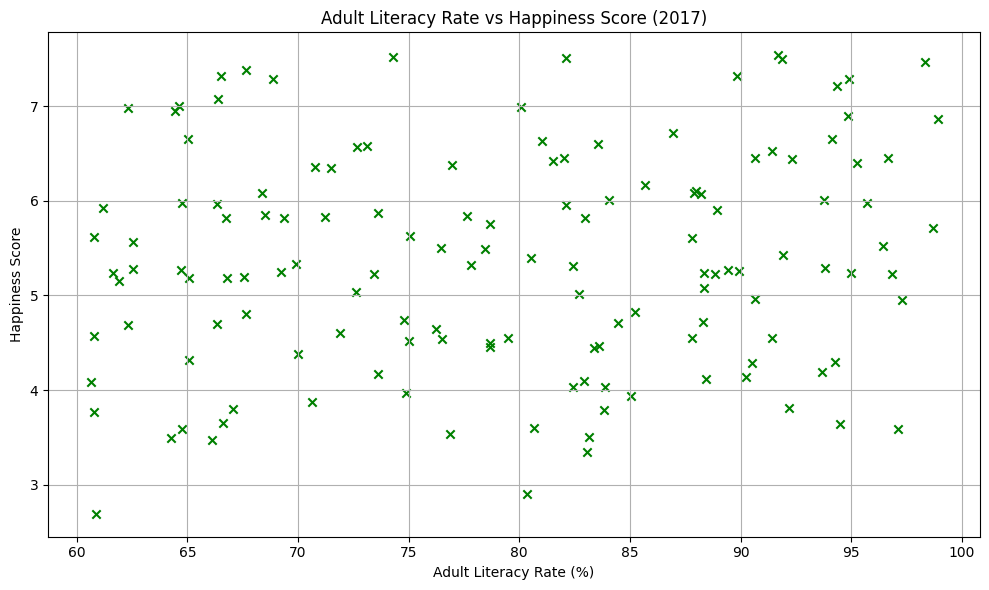

In [ ]:



# Load happiness data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Load literacy data
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Find header and 2017 index
for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

# Extract literacy rates
countries = []
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            countries.append(country)
            literacy_rates.append(value)
        except ValueError:
            continue

# Get happiness scores for matched countries
happy_scores = []
for country in countries:
    row = happiness_df[happiness_df["Country"] == country]
    if not row.empty:
        happy_scores.append(float(row["Happiness.Score"].values[0]))

# Plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(literacy_rates, happy_scores, color="green", marker='x')
plt.title("Adult Literacy Rate vs Happiness Score (2017)")
plt.xlabel("Adult Literacy Rate (%)")
plt.ylabel("Happiness Score")
plt.grid(True)



plt.tight_layout()
plt.show()


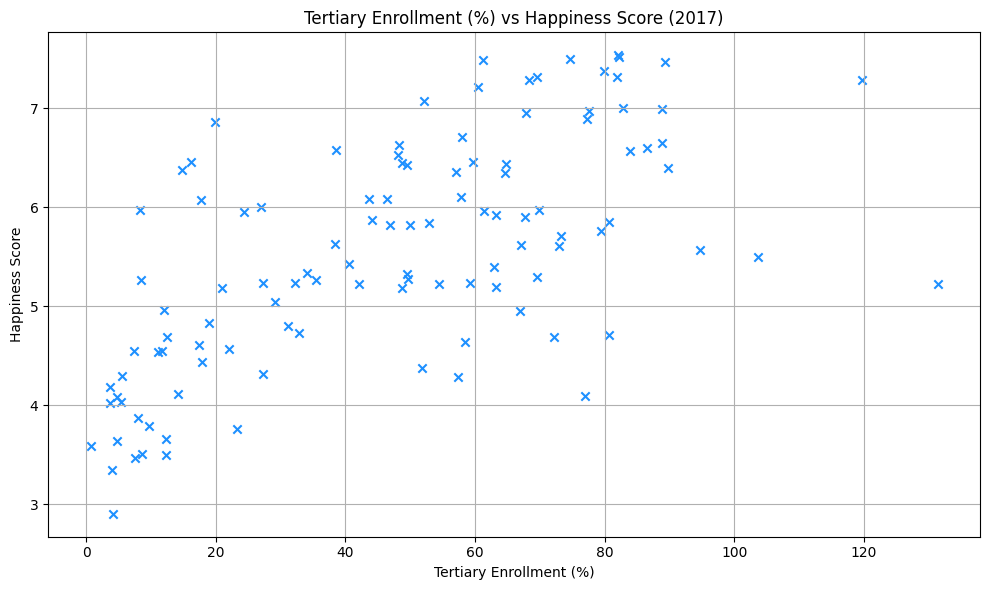

In [ ]:


happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")

countries = []
enrollments = []

with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if len(parts) > 61:
        try:
            value = float(parts[61].strip().strip('"'))
            countries.append(country)
            enrollments.append(value)
        except ValueError:
            continue

matched_countries = set(happiness_df["Country"].str.strip())
final_countries = []
final_enrollments = []
final_scores = []

for country, enr in zip(countries, enrollments):
    row = happiness_df[happiness_df["Country"] == country]
    if not row.empty:
        score = float(row["Happiness.Score"].values[0])
        final_countries.append(country)
        final_enrollments.append(enr)
        final_scores.append(score)

plt.figure(figsize=(10, 6))
plt.scatter(final_enrollments, final_scores, color='dodgerblue', marker ='x')
plt.title("Tertiary Enrollment (%) vs Happiness Score (2017)")
plt.xlabel("Tertiary Enrollment (%)")
plt.ylabel("Happiness Score")
plt.grid(True)


plt.tight_layout()
plt.show()


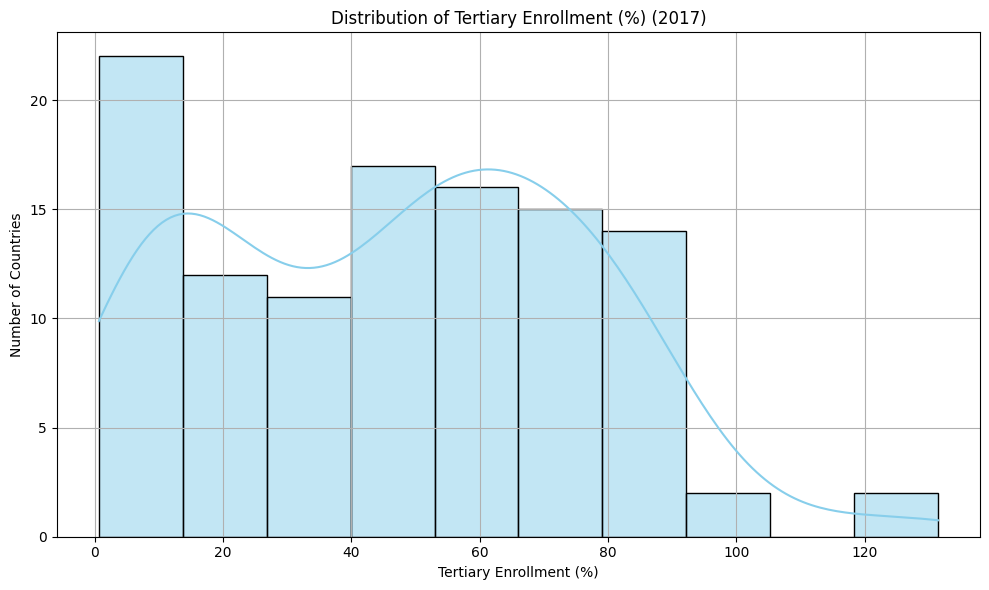

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(final_enrollments, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Tertiary Enrollment (%) (2017)")
plt.xlabel("Tertiary Enrollment (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()


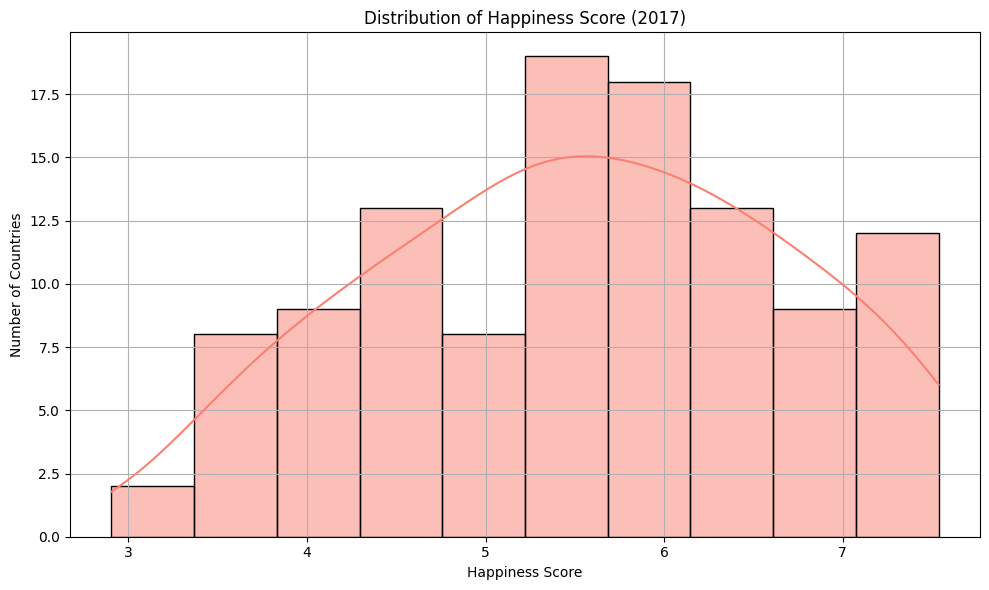

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(final_scores, bins=10, kde=True, color='salmon', edgecolor='black')
plt.title("Distribution of Happiness Score (2017)")
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()



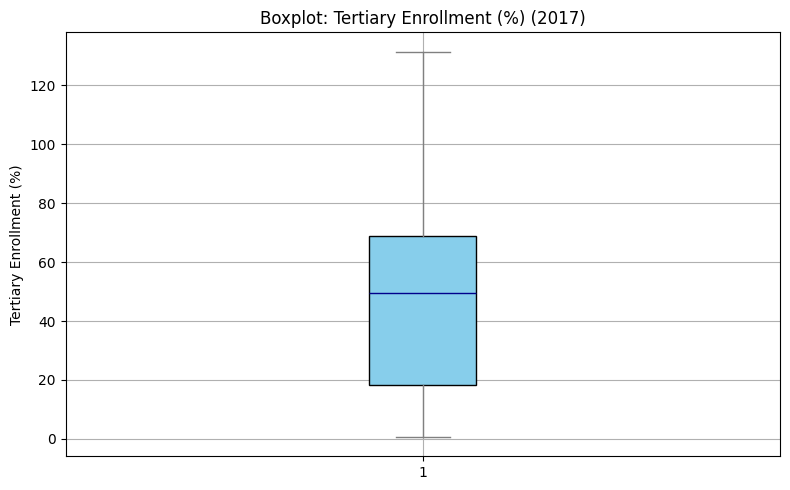

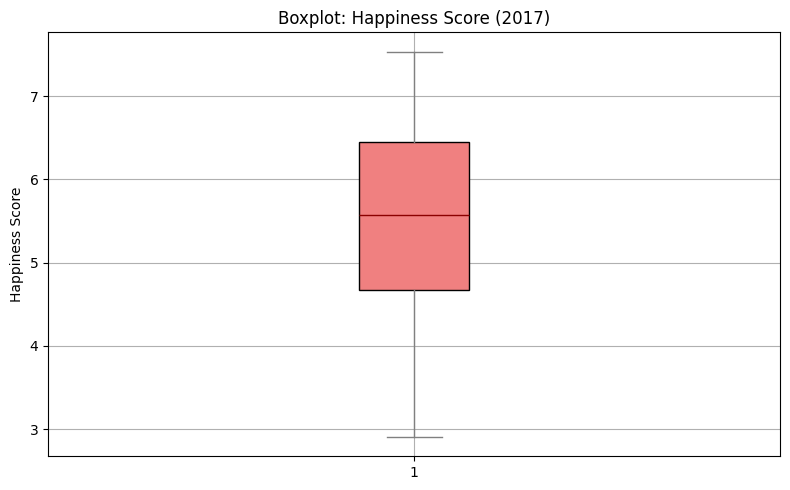

In [ ]:

# Load happiness data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Reload tertiary data
with open("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Get countries with tertiary enrollment and happiness
final_countries = []
final_enrollments = []
final_scores = []

for line in lines[5:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > 61:
        try:
            enrollment = float(parts[61].strip().strip('"'))
            score_row = happiness_df[happiness_df["Country"] == country]
            if not score_row.empty:
                score = float(score_row["Happiness.Score"].values[0])
                final_countries.append(country)
                final_enrollments.append(enrollment)
                final_scores.append(score)
        except:
            continue

# Plot separate boxplots
import matplotlib.pyplot as plt

# Boxplot: Tertiary Enrollment separately
plt.figure(figsize=(8, 5))
plt.boxplot(final_enrollments, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Tertiary Enrollment (%) (2017)")
plt.ylabel("Tertiary Enrollment (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Happiness Score separately
plt.figure(figsize=(8, 5))
plt.boxplot(final_scores, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='darkred'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Happiness Score (2017)")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


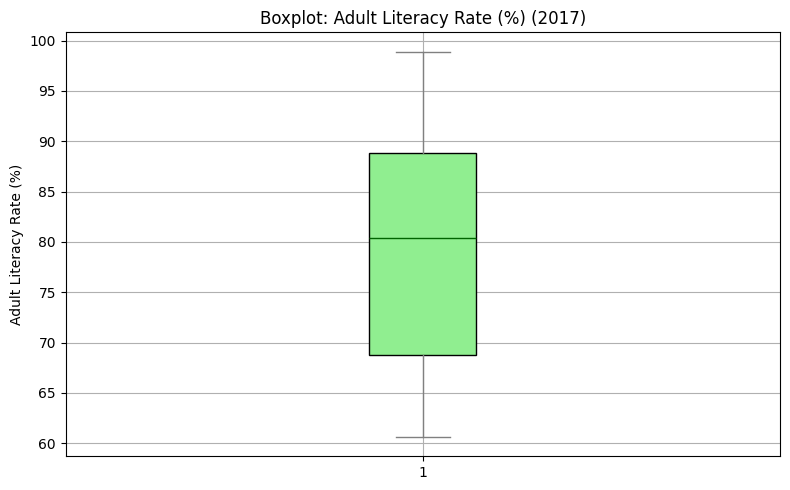

In [ ]:
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Find header and index of 2017
for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

# Match with happiness countries
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Extract literacy values for matched countries
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            literacy_rates.append(value)
        except ValueError:
            continue

# Plot boxplot for literacy
plt.figure(figsize=(8, 5))
plt.boxplot(literacy_rates, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot: Adult Literacy Rate (%) (2017)")
plt.ylabel("Adult Literacy Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


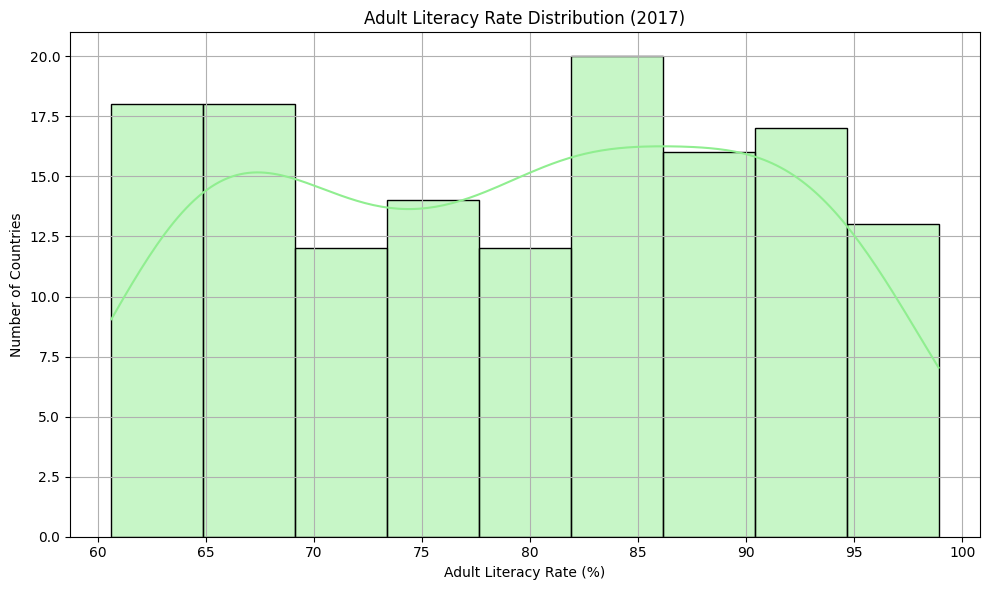

In [ ]:
-

# Plot  the KDE + Histogram for Adult Literacy Rate
plt.figure(figsize=(10, 6))
sns.histplot(literacy_rates, kde=True, color='lightgreen', edgecolor='black')

plt.title("Adult Literacy Rate Distribution (2017)")
plt.xlabel("Adult Literacy Rate (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()


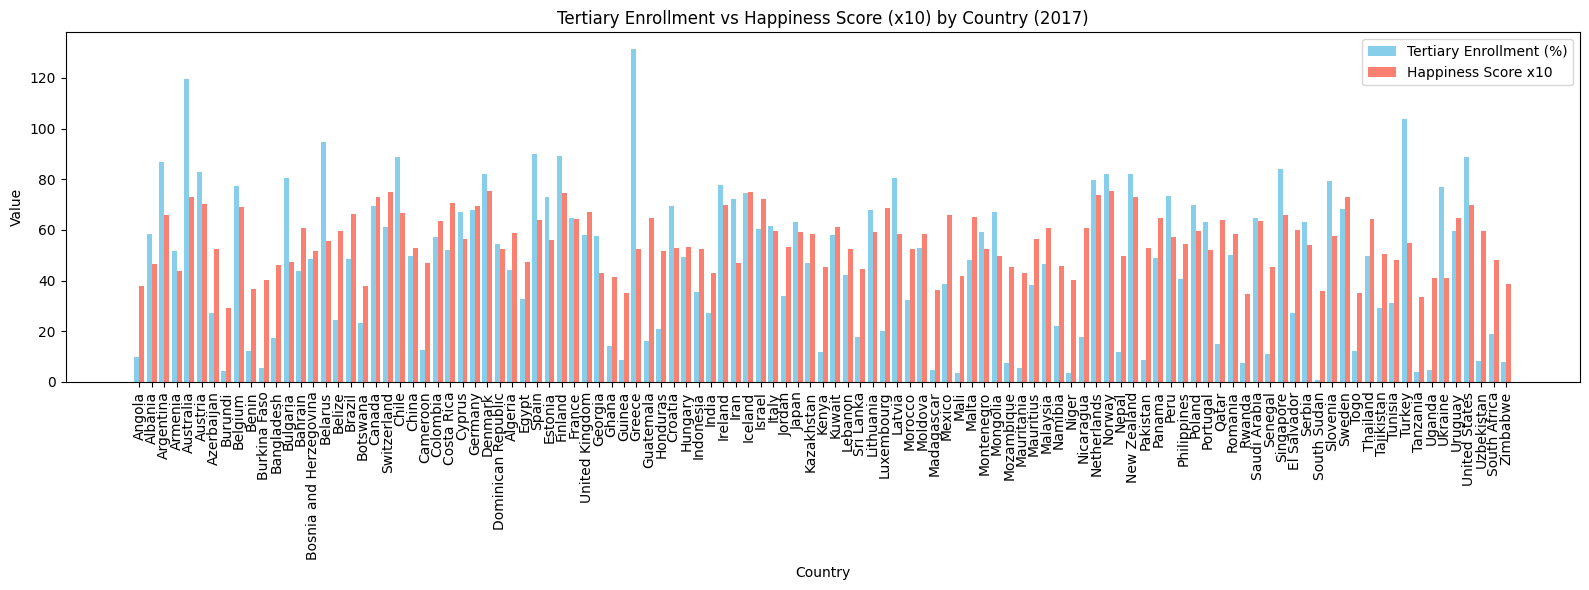

In [ ]:


scaled_scores = [score * 10 for score in final_scores]

plt.figure(figsize=(16, 6))

x = np.arange(len(final_countries))
width = 0.4


plt.bar(x - width/2, final_enrollments, width=width, label="Tertiary Enrollment (%)", color="skyblue")
plt.bar(x + width/2, scaled_scores, width=width, label="Happiness Score x10", color="salmon")


plt.xticks(ticks=x, labels=final_countries, rotation=90)


plt.title("Tertiary Enrollment vs Happiness Score (x10) by Country (2017)")
plt.xlabel("Country")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


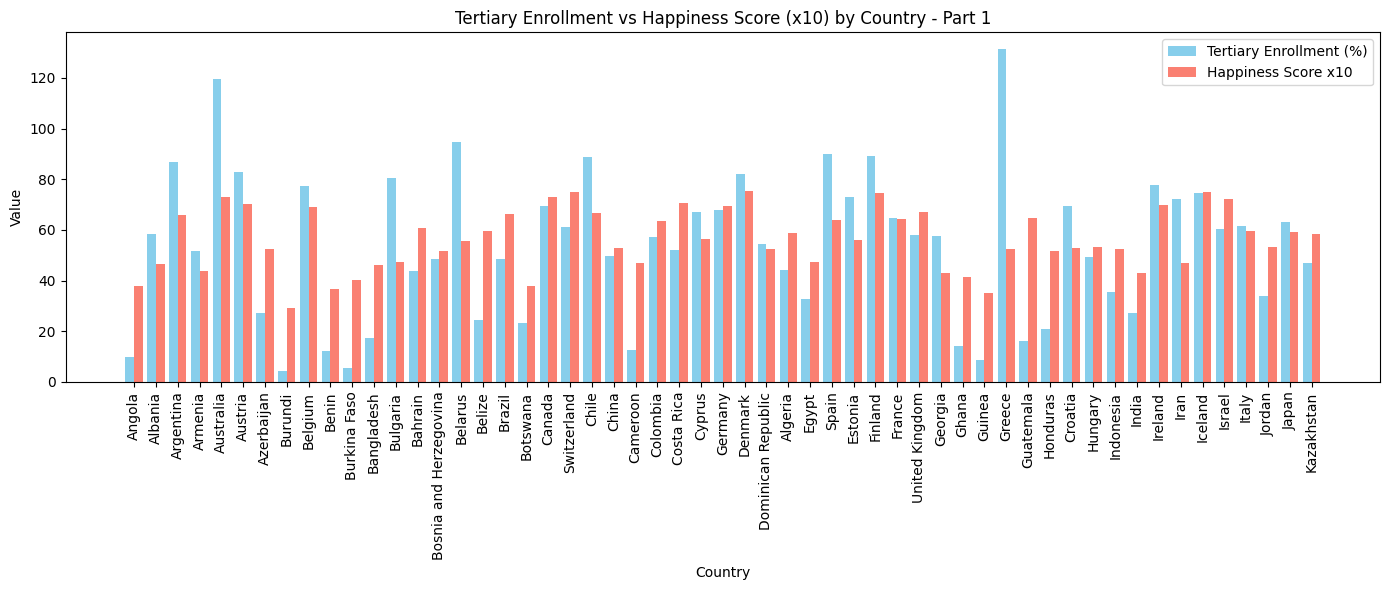

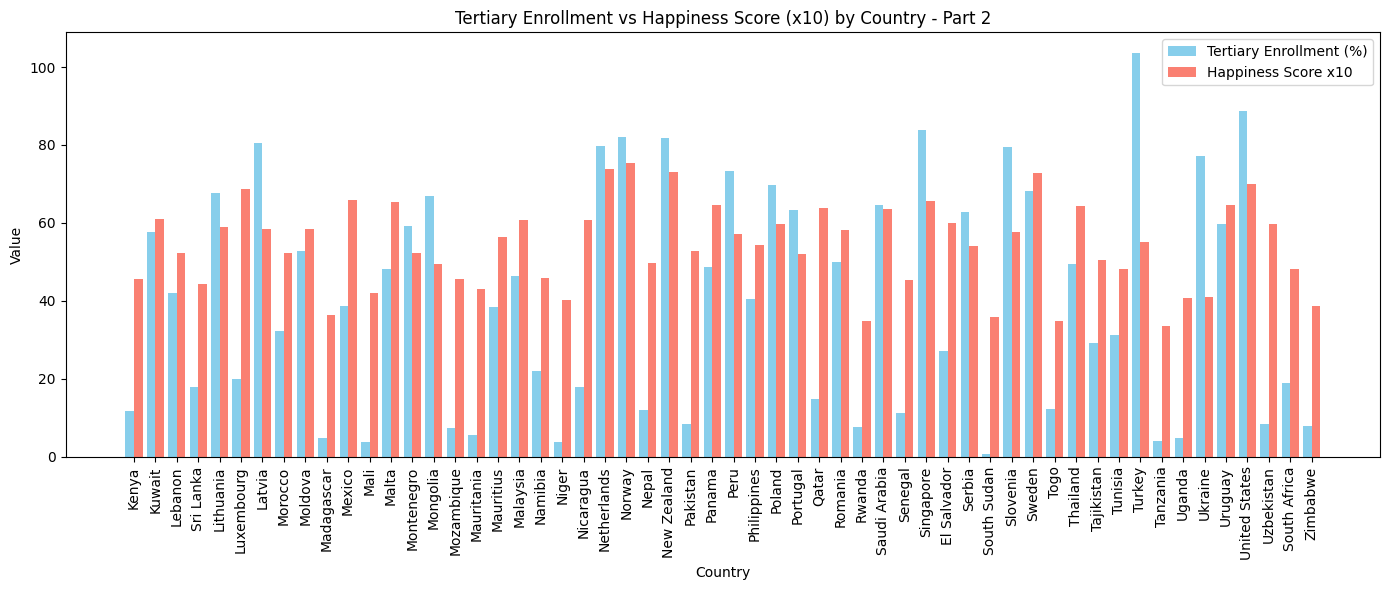

In [ ]:
#Bar chart with tertiary enrollment and happiness score with 2 part

split_index = len(final_countries) // 2

country_splits = [final_countries[:split_index], final_countries[split_index:]]
enrollment_splits = [final_enrollments[:split_index], final_enrollments[split_index:]]
score_splits = [final_scores[:split_index], final_scores[split_index:]]

for i in range(2):
    x = np.arange(len(country_splits[i]))
    scaled_scores = [s * 10 for s in score_splits[i]]

    plt.figure(figsize=(14, 6))
    plt.bar(x - 0.2, enrollment_splits[i], width=0.4, label="Tertiary Enrollment (%)", color="skyblue")
    plt.bar(x + 0.2, scaled_scores, width=0.4, label="Happiness Score x10", color="salmon")

    plt.xticks(ticks=x, labels=country_splits[i], rotation=90)
    plt.title(f"Tertiary Enrollment vs Happiness Score (x10) by Country - Part {i+1}")
    plt.xlabel("Country")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


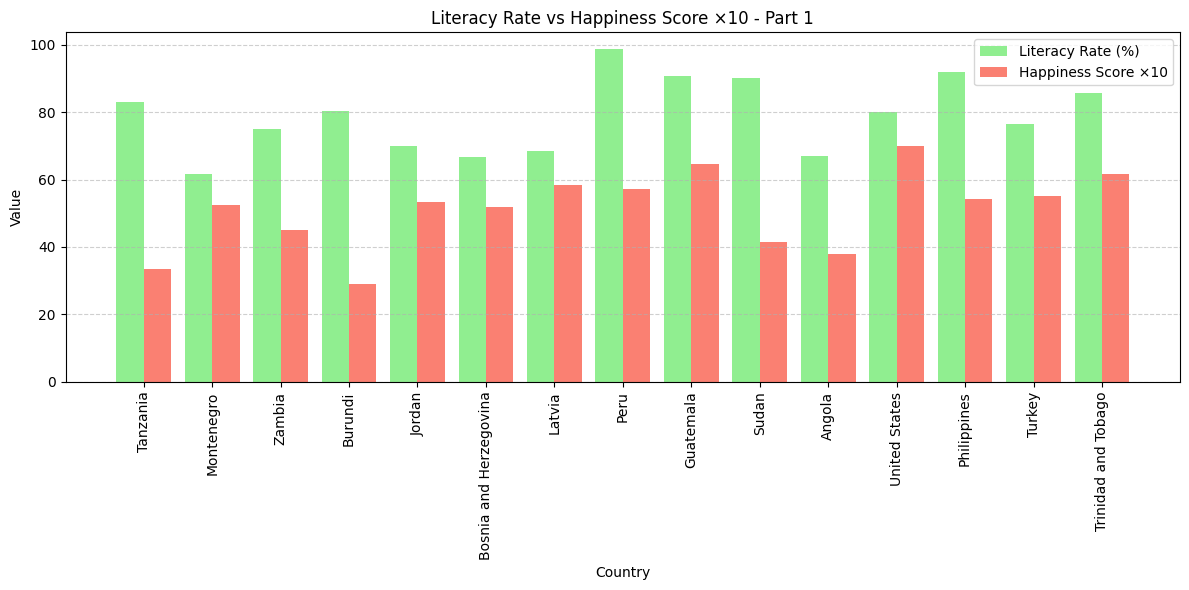

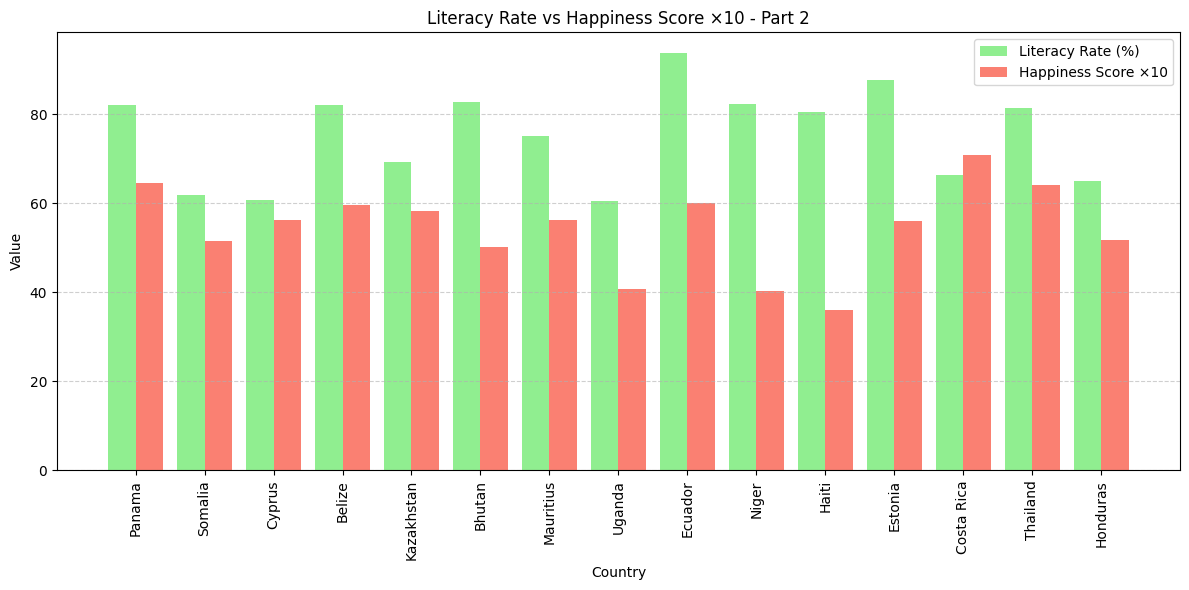

In [ ]:



# Load happiness data
happiness_df = pd.read_csv("Countries' Happiness Data 2017.csv")
happiness_countries = set(happiness_df["Country"].str.strip())

# Load literacy data
with open("API_SE.ADT.LITR.ZS_DS2_en_csv_v2_19396.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Find header and year index
for i, line in enumerate(lines):
    if "2017" in line:
        header = line.strip().split(",")
        year_index = [j for j, col in enumerate(header) if col.strip('"') == "2017"][0]
        data_start = i + 1
        break

# Extract literacy data
countries = []
literacy_rates = []

for line in lines[data_start:]:
    parts = line.strip().split(",")
    country = parts[0].strip('"')
    if country in happiness_countries and len(parts) > year_index:
        try:
            value = float(parts[year_index].strip().strip('"'))
            countries.append(country)
            literacy_rates.append(value)
        except ValueError:
            continue

# Match happiness scores
happy_scores = []
valid_countries = []
valid_lit = []
valid_happy = []

for country, lit in zip(countries, literacy_rates):
    row = happiness_df[happiness_df["Country"] == country]
    if not row.empty:
        happy = float(row["Happiness.Score"].values[0])
        valid_countries.append(country)
        valid_lit.append(lit)
        valid_happy.append(happy * 10)

# Zip for plotting
valid_data = list(zip(valid_countries, valid_lit, valid_happy))

# Shuffle and split
random.seed(42)
random.shuffle(valid_data)

part1 = valid_data[:15]
part2 = valid_data[15:30]

def plot_part(data, title):
    labels, literacy, happiness = zip(*data)
    x = np.arange(len(labels))
    bar_width = 0.4

    plt.figure(figsize=(12, 6))
    plt.bar(x - bar_width/2, literacy, width=bar_width, label="Literacy Rate (%)", color='lightgreen')
    plt.bar(x + bar_width/2, happiness, width=bar_width, label="Happiness Score ×10", color='salmon')

    plt.xticks(x, labels, rotation=90)
    plt.xlabel("Country")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot them
plot_part(part1, "Literacy Rate vs Happiness Score ×10 - Part 1")
plot_part(part2, "Literacy Rate vs Happiness Score ×10 - Part 2")


## HAPPINESS VARIABLES

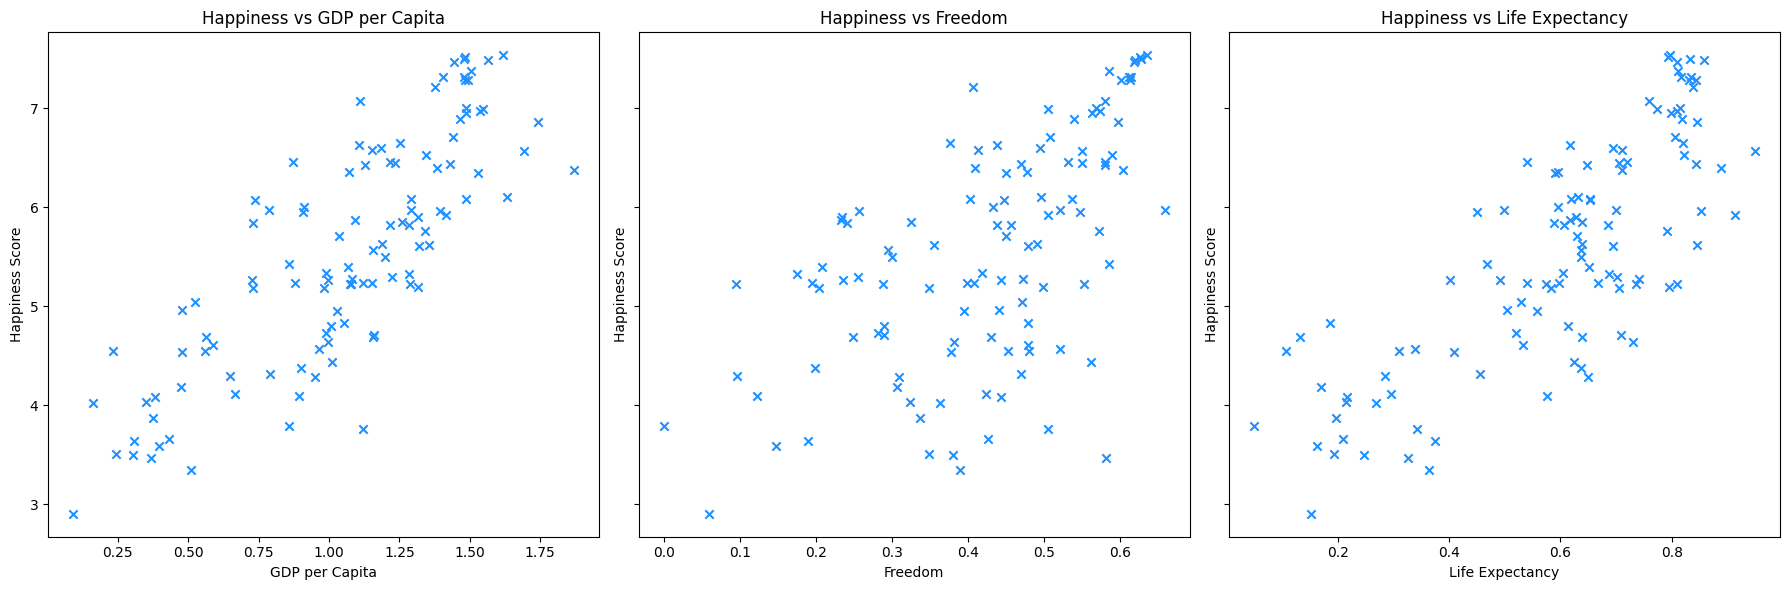

In [ ]:
#Scatter plot with happiness variables


# Filter and align happiness data for only the matched countries
happiness_filtered = happiness_df[happiness_df["Country"].isin(final_countries)]

# Prepare X variables and Y (Happiness Score)
gdp = happiness_filtered["Economy..GDP.per.Capita."].astype(float).tolist()
freedom = happiness_filtered["Freedom"].astype(float).tolist()
life_exp = happiness_filtered["Health..Life.Expectancy."].astype(float).tolist()
happy = happiness_filtered["Happiness.Score"].astype(float).tolist()
countries_scatter = happiness_filtered["Country"].tolist()

# Set up scatter plots for each factor
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

factors = [gdp, freedom, life_exp]
labels = ["GDP per Capita", "Freedom", "Life Expectancy"]

for ax, x, label in zip(axes, factors, labels):
    ax.scatter(x, happy, color="dodgerblue", marker='x')
    ax.set_xlabel(label)
    ax.set_ylabel("Happiness Score")
    ax.set_title(f"Happiness vs {label}")


plt.tight_layout()
plt.show()


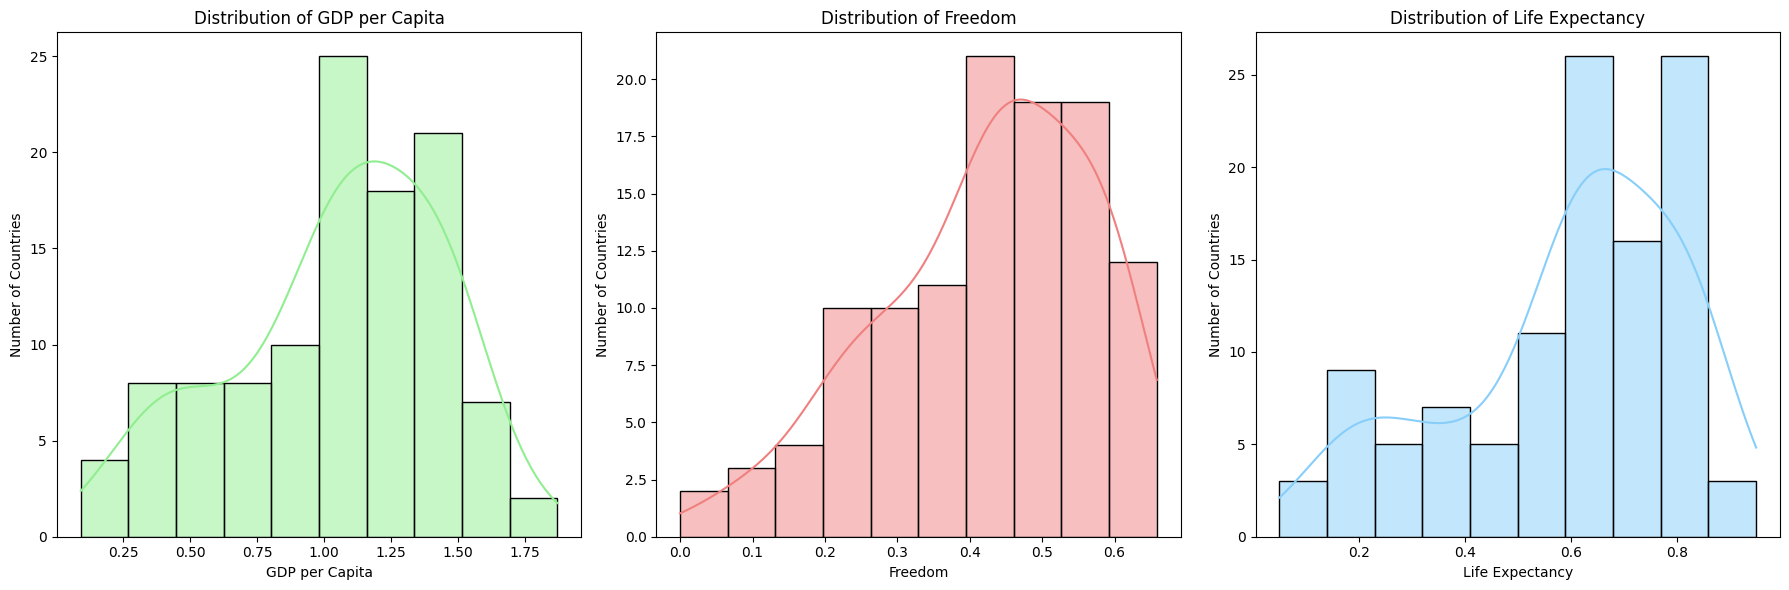

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables = [gdp, freedom, life_exp]
labels = ["GDP per Capita", "Freedom", "Life Expectancy"]
colors = ["lightgreen", "lightcoral", "lightskyblue"]

for ax, data, label, color in zip(axes, variables, labels, colors):
    sns.histplot(data, bins=10, kde=True, color=color, edgecolor='black', ax=ax)
    ax.set_title(f"Distribution of {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Number of Countries")

plt.tight_layout()
plt.show()


## FOREST AREA DATA

In [ ]:

file_path = "API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv"

df = pd.read_csv(file_path, skiprows=4)

forest_2017 = df[["Country Name", "2017"]].dropna()

print(forest_2017)


                    Country Name       2017
0                          Aruba   2.333333
1    Africa Eastern and Southern  30.824316
2                    Afghanistan   1.852782
3     Africa Western and Central  20.071327
4                         Angola  54.762629
..                           ...        ...
260                        Samoa  58.672662
262                  Yemen, Rep.   1.039832
263                 South Africa  14.145109
264                       Zambia  61.042885
265                     Zimbabwe  45.451183

[262 rows x 2 columns]


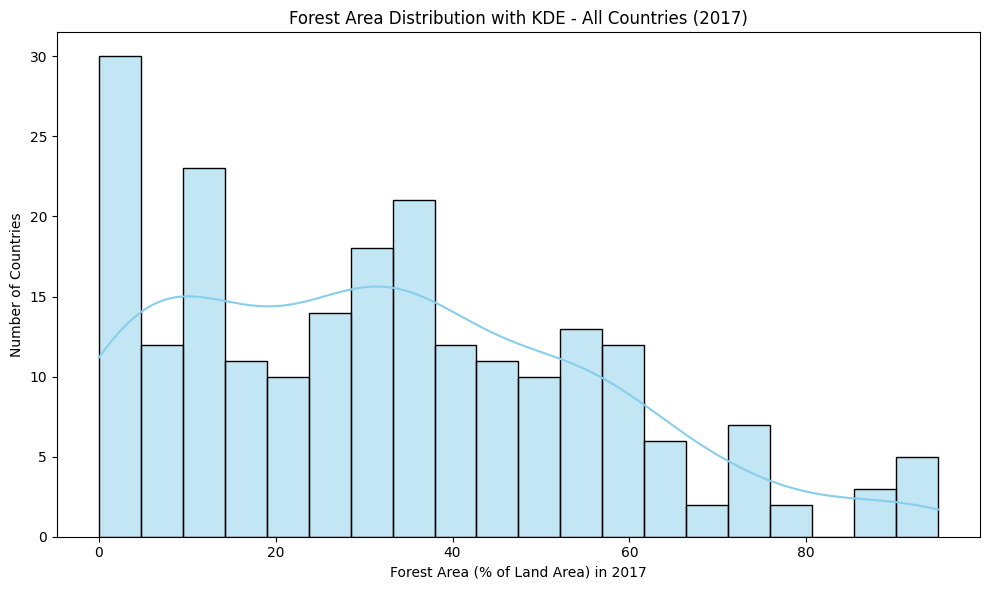

In [ ]:

df = pd.read_csv("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", skiprows=4)

non_countries_keywords = [
    "World", "income", "region", "developing", "countries", "Africa", "Europe",
    "Asia", "Middle East", "Arab", "Caribbean", "Pacific", "Sub-Saharan", "OECD"
]
mask = ~df["Country Name"].str.contains('|'.join(non_countries_keywords), case=False, na=False)
df_filtered = df[mask][["Country Name", "2017"]].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["2017"], kde=True, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Forest Area (% of Land Area) in 2017")
plt.ylabel("Number of Countries")
plt.title("Forest Area Distribution with KDE - All Countries (2017)")
plt.tight_layout()
plt.show()


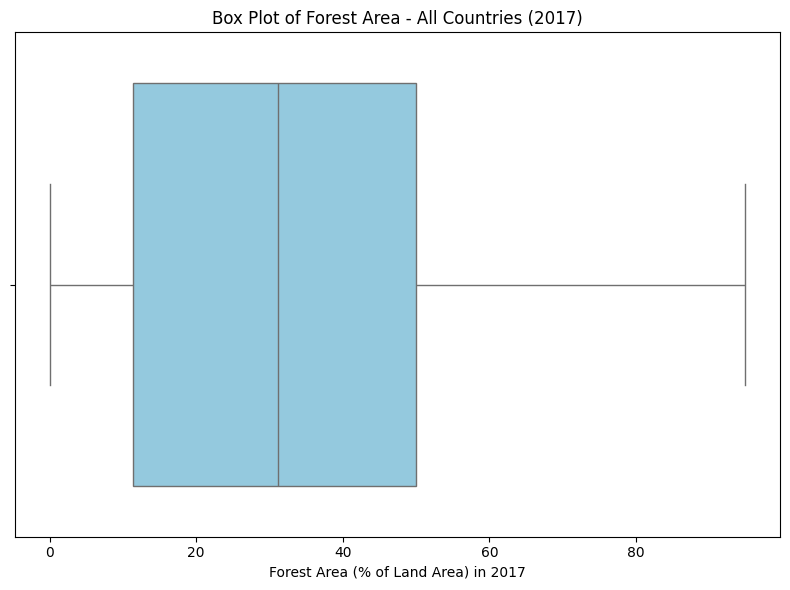

In [ ]:

df = pd.read_csv("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", skiprows=4)

non_countries_keywords = [
    "World", "income", "region", "developing", "countries", "Africa", "Europe",
    "Asia", "Middle East", "Arab", "Caribbean", "Pacific", "Sub-Saharan", "OECD"
]
mask = ~df["Country Name"].str.contains('|'.join(non_countries_keywords), case=False, na=False)
df_filtered = df[mask][["Country Name", "2017"]].dropna()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered["2017"], color="skyblue")
plt.xlabel("Forest Area (% of Land Area) in 2017")
plt.title("Box Plot of Forest Area - All Countries (2017)")
plt.tight_layout()
plt.show()


FOREST AREA X HAPPINESS SCORE

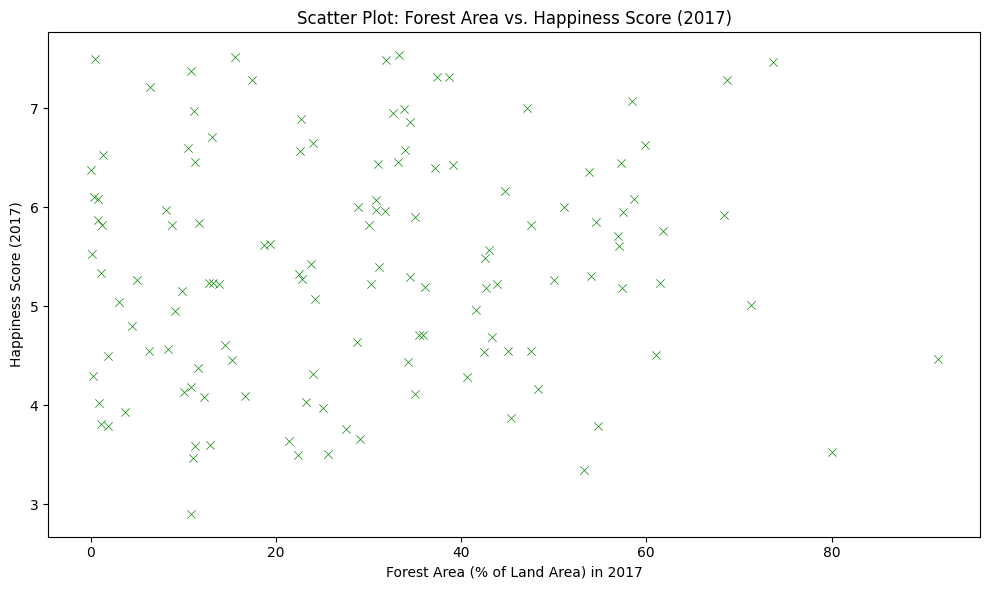

In [ ]:

forest_df = pd.read_csv("Forest_Area__2017__-_All_Valid_Countries.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

merged_df = pd.merge(happiness_df, forest_df, left_on="Country", right_on="Country Name")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="2017", y="Happiness.Score",marker="x",color="green")
plt.xlabel("Forest Area (% of Land Area) in 2017")
plt.ylabel("Happiness Score (2017)")
plt.title("Scatter Plot: Forest Area vs. Happiness Score (2017)")
plt.tight_layout()
plt.show()


<ipython-input-26-7004a08f1953>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=grouped, x="Label", y="2017", order=sorted_labels, palette="viridis")


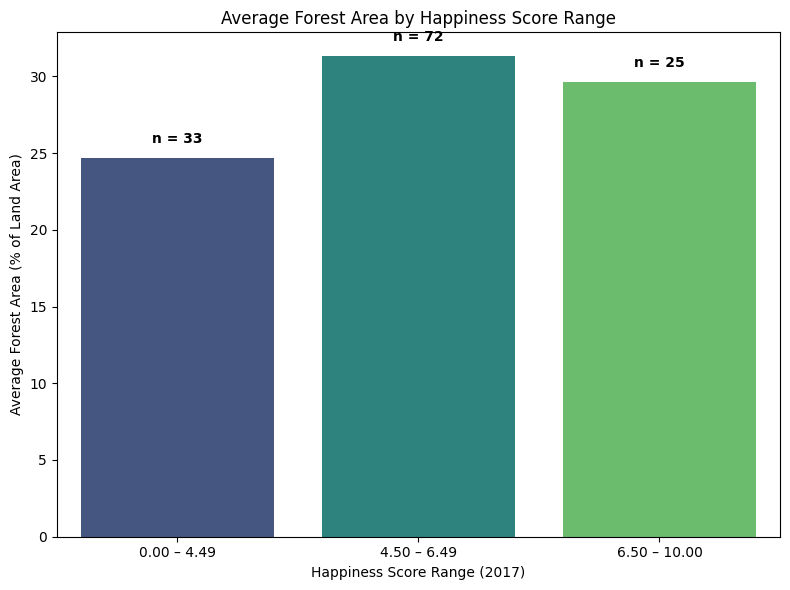

In [ ]:

forest_df = pd.read_csv("Forest_Area__2017__-_All_Valid_Countries.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

merged_df = pd.merge(happiness_df, forest_df, left_on="Country", right_on="Country Name")

def categorize_happiness(score):
    if score < 4.5:
        return "Low"
    elif score < 6.5:
        return "Medium"
    else:
        return "High"

merged_df["Happiness Category"] = merged_df["Happiness.Score"].apply(categorize_happiness)

grouped = merged_df.groupby("Happiness Category")["2017"].mean().reset_index()
grouped["Label"] = grouped["Happiness Category"].map({
    "Low": "0.00 – 4.49",
    "Medium": "4.50 – 6.49",
    "High": "6.50 – 10.00"
})

sorted_labels = ["0.00 – 4.49", "4.50 – 6.49", "6.50 – 10.00"]
category_order = ["Low", "Medium", "High"]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=grouped, x="Label", y="2017", order=sorted_labels, palette="viridis")

for i, label in enumerate(sorted_labels):
    val = grouped[grouped["Label"] == label]["2017"].values[0]
    count = merged_df[merged_df["Happiness Category"] == category_order[i]].shape[0]
    barplot.text(i, val + 1, f"n = {count}", ha='center', fontweight='bold')

plt.ylabel("Average Forest Area (% of Land Area)")
plt.xlabel("Happiness Score Range (2017)")
plt.title("Average Forest Area by Happiness Score Range")
plt.tight_layout()
plt.show()


In [ ]:



forest_df = pd.read_csv("Forest_Area__2017__-_All_Valid_Countries.csv")

forest_data = forest_df["2017"].dropna()

count = forest_data.count()
mean = forest_data.mean()
median = forest_data.median()
try:
    mode_val = mode(forest_data)
except:
    mode_val = "No unique mode"
variance = forest_data.var()
std_dev = forest_data.std()

print("Forest Area Ratio (2017) %0-100")
print(" ")
print(f"Count : {count}")
print(f"Mean : {mean:.2f}")
print(f"Median : {median:.2f}")
print(f"Mode : {mode_val}")
print(f"Variance : {variance:.2f}")
print(f"Standard Deviation : {std_dev:.2f}")


Forest Area Ratio (2017) % 0-100
 
Count : 222
Mean : 32.59
Median : 31.18
Mode : 0.0
Variance : 559.32
Standard Deviation : 23.65


In [ ]:

forest_df = pd.read_csv("Forest_Area__2017__-_All_Valid_Countries.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

merged_df = pd.merge(happiness_df, forest_df, left_on="Country", right_on="Country Name")

forest = merged_df["2017"]
happiness = merged_df["Happiness.Score"]

pearson_corr, pearson_p = pearsonr(forest, happiness)

spearman_corr, spearman_p = spearmanr(forest, happiness)

print("Forest Area vs Happiness Score (Pearson Correlation)")
print(f"Correlation Coefficient (r): {pearson_corr:.4f}")
print(f"P-value                 : {pearson_p:.4e}")
print()

print("Forest Area vs Happiness Score (Spearman Correlation)")
print(f"Correlation Coefficient (ρ): {spearman_corr:.4f}")
print(f"P-value                   : {spearman_p:.4e}")


Forest Area vs Happiness Score (Pearson Correlation)
Correlation Coefficient (r): 0.0957
P-value                 : 2.7854e-01

Forest Area vs Happiness Score (Spearman Correlation)
Correlation Coefficient (ρ): 0.1037
P-value                   : 2.4025e-01


## AIR POLLUTION DATA

In [ ]:

df = pd.read_csv('API_EN.ATM.PM25.MC.M3_DS2_en_csv_v2_87588.csv', skiprows=4)

df_2017 = df[['Country Name', '2017']].copy()
df_2017.columns = ['Country', 'PM2.5_2017']

df_2017.dropna(inplace=True)

output_path = "PM2.5_2017_Countries.xlsx"
df_2017.to_excel(output_path, index=False)

print(df_2017)


                         Country  PM2.5_2017
1    Africa Eastern and Southern   27.311377
2                    Afghanistan   65.862347
3     Africa Western and Central   60.344618
4                         Angola   23.959151
5                        Albania   18.555244
..                           ...         ...
260                        Samoa   12.089138
262                  Yemen, Rep.   42.120481
263                 South Africa   23.754937
264                       Zambia   23.758282
265                     Zimbabwe   17.997754

[248 rows x 2 columns]
Excel dosyası başarıyla oluşturuldu: PM2.5_2017_Countries.xlsx


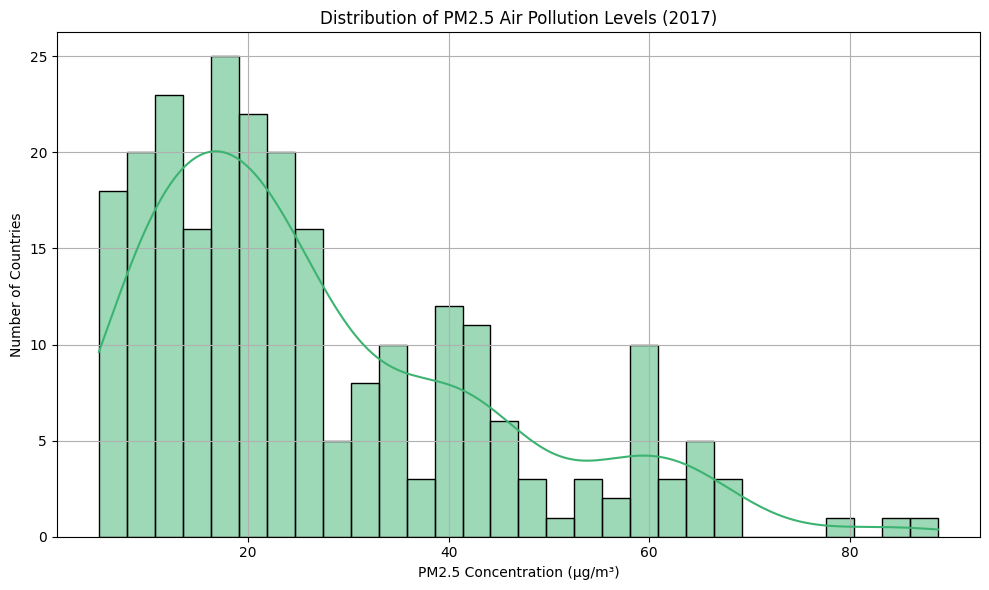

,PM2.5_2017
count,248.000000
mean,27.063164
std,17.321239
min,5.126740
25%,13.628277
50%,21.859972
75%,38.526716
max,88.787883


In [ ]:


df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")

plt.figure(figsize=(10, 6))
sns.histplot(df_pm25['PM2.5_2017'], kde=True, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of PM2.5 Air Pollution Levels (2017)')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

df_pm25.describe()


<ipython-input-6-e631ac271d00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pollution_Level', y='PM2.5_2017', data=df_pm25, palette='Blues')


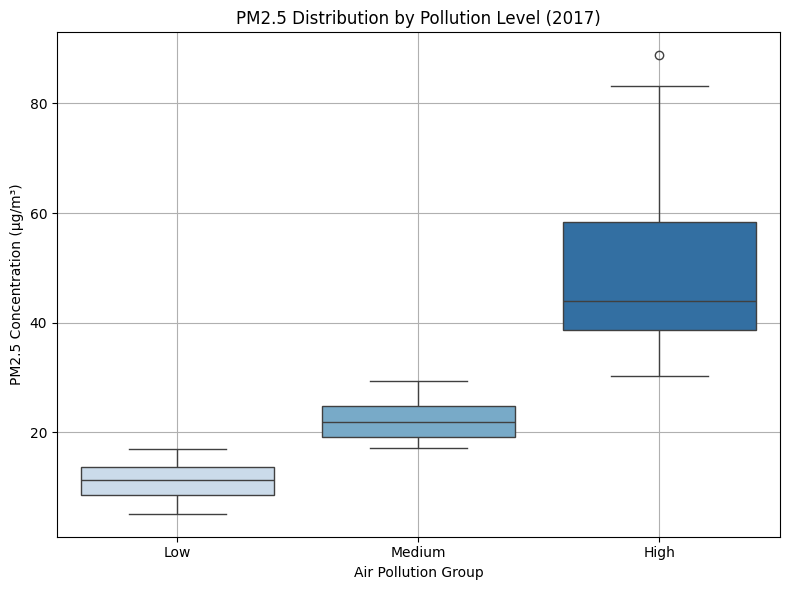

In [ ]:
df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")
df_pm25['Pollution_Level'] = pd.qcut(df_pm25['PM2.5_2017'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pollution_Level', y='PM2.5_2017', data=df_pm25, palette='Blues')
plt.title('PM2.5 Distribution by Pollution Level (2017)')
plt.xlabel('Air Pollution Group')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")

df_pm25_map = df_pm25.copy()
df_pm25_map.columns = ['Country', 'PM2.5']

fig = px.choropleth(
    df_pm25_map,
    locations='Country',
    locationmode='country names',
    color='PM2.5',
    color_continuous_scale='YlOrRd',
    title='Global PM2.5 Air Pollution Levels (2017)',
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [ ]:
import pandas as pd

df_pm25 = pd.read_excel("PM2.5_2017_Countries.xlsx")

pm25_stats = {
    'Count': int(df_pm25['PM2.5_2017'].count()),
    'Mean': round(float(df_pm25['PM2.5_2017'].mean()), 2),
    'Median': round(float(df_pm25['PM2.5_2017'].median()), 2),
    'Mode': round(float(df_pm25['PM2.5_2017'].mode()[0]), 2),
    'Variance': round(float(df_pm25['PM2.5_2017'].var()), 2),
    'Standard Deviation': round(float(df_pm25['PM2.5_2017'].std()), 2)
}

for k, v in pm25_stats.items():
    print(f"{k} : {v}")


Count : 248
Mean : 27.06
Median : 21.86
Mode : 40.78
Variance : 300.03
Standard Deviation : 17.32


In [ ]:


happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")[['Country', 'Happiness.Score']]
pm25_df = pd.read_excel("PM2.5_2017_Countries.xlsx")

merged_df = pd.merge(happiness_df, pm25_df, on='Country')

pearson_corr, pearson_p = pearsonr(merged_df['PM2.5_2017'], merged_df['Happiness.Score'])
spearman_corr, spearman_p = spearmanr(merged_df['PM2.5_2017'], merged_df['Happiness.Score'])

print("Air Pollution (PM2.5) vs Happiness Score (2017)")
print(f"Pearson Correlation Coefficient (r): {round(pearson_corr, 4)}")
print(f"Pearson P-value                   : {round(pearson_p, 4)}\n")
print(f"Spearman Correlation Coefficient (ρ): {round(spearman_corr, 4)}")
print(f"Spearman P-value                     : {round(spearman_p, 4)}")


Air Pollution (PM2.5) vs Happiness Score (2017)
Pearson Correlation Coefficient (r): -0.4664
Pearson P-value                   : 0.0

Spearman Correlation Coefficient (ρ): -0.5832
Spearman P-value                     : 0.0


AIR POLLUTION X HAPPINESS SCORE

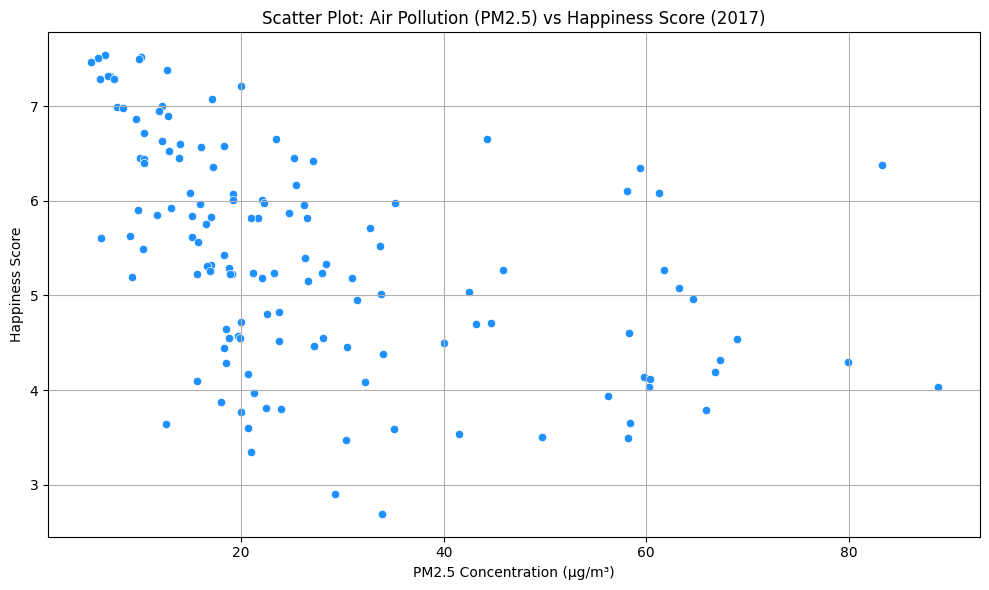

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PM2.5_2017',
    y='Happiness.Score',
    data=merged_df,
    color='dodgerblue'
)

plt.title('Scatter Plot: Air Pollution (PM2.5) vs Happiness Score (2017)')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

air_df = pd.read_excel("PM2.5_2017_Countries.xlsx")
edu_df = pd.read_excel("Filtered_Tertiary_Enrollment_2017 (1).xlsx")
hap_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

air_df.columns = ['Country', 'Air Pollution']
edu_df.columns = ['Country', 'Tertiary Enrollment']
hap_df = hap_df[['Country', 'Happiness.Score']]
hap_df.columns = ['Country', 'Happiness Score']

merged_df = pd.merge(edu_df, air_df, on='Country')
merged_df = pd.merge(merged_df, hap_df, on='Country')


## COASTLINE DATA

In [9]:

coast_countries = []
coast_ratios = []

with open("coastlines.csv", encoding="utf-8") as f:
    lines = f.readlines()[1:]  # skip header

    for line in lines:
        parts = line.strip().split(",")

        if len(parts) > 4:
            country = parts[0].replace('""', '').replace('"', '').strip()
            value = parts[4].replace('""', '').replace('"', '').strip()

            if value:
                try:
                    coast_ratios.append(float(value))
                    coast_countries.append(country)
                except ValueError:
                    continue

df_coast = pd.DataFrame({
    "Country": coast_countries,
    "Coastline to Area Ratio": coast_ratios
})

print(df_coast.to_string(index=False))


                         Country  Coastline to Area Ratio
                     Afghanistan                 0.000000
                         Albania                 1.259218
                         Algeria                 0.041902
                  American Samoa                51.785714
                         Andorra                 0.000000
                          Angola                 0.128339
                        Anguilla                67.032967
             Antigua and Barbuda                34.568459
                       Argentina                 0.179435
                         Armenia                 0.000000
                           Aruba                38.055556
                       Australia                 0.332764
                         Austria                 0.000000
                      Azerbaijan                 0.000000
                         Bahamas                25.518732
                         Bahrain                21.184211
              

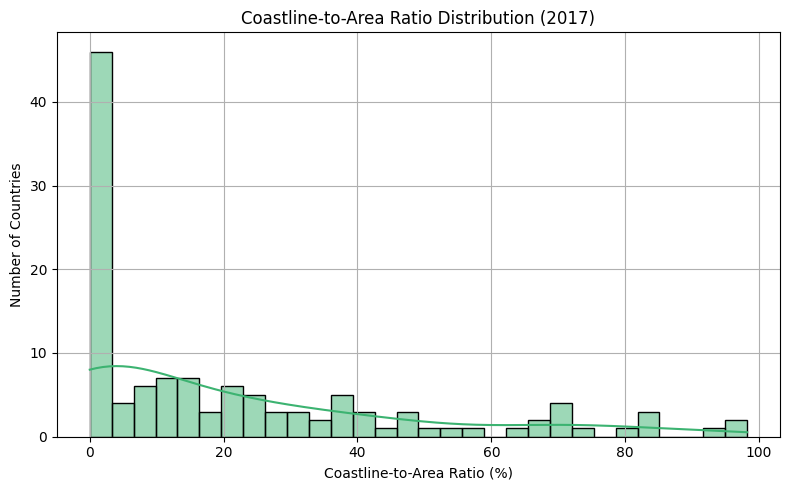

In [ ]:


df = pd.read_csv("coastlines.csv")
df["coast_ratio"] = df["coast_to_area_wf"] * 100
df = df.dropna(subset=["coast_ratio"])
df = df[df["coast_ratio"] <= 100]

plt.figure(figsize=(8, 5))
sns.histplot(df["coast_ratio"], bins=30, kde=True, color="mediumseagreen", edgecolor="black")
plt.xlabel("Coastline-to-Area Ratio (%)")
plt.ylabel("Number of Countries")
plt.title("Coastline-to-Area Ratio Distribution (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


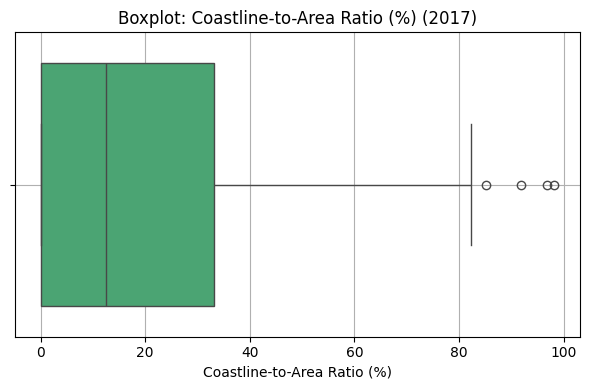

In [ ]:


plt.figure(figsize=(6, 4))
sns.boxplot(x=df["coast_ratio"], color="mediumseagreen")
plt.xlabel("Coastline-to-Area Ratio (%)")
plt.title("Boxplot: Coastline-to-Area Ratio (%) (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


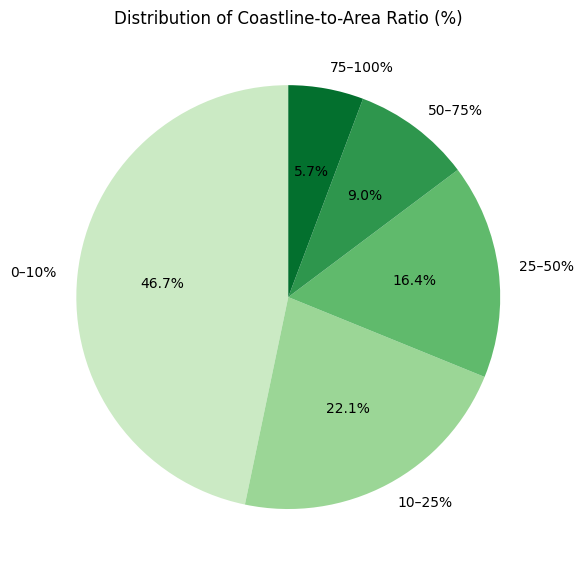

In [ ]:

df = pd.read_csv("coastlines.csv")
df["coast_ratio"] = df["coast_to_area_wf"] * 100
df = df.dropna(subset=["coast_ratio"])

bins = [0, 10, 25, 50, 75, 100]
labels = ["0–10%", "10–25%", "25–50%", "50–75%", "75–100%"]
df["coast_bin"] = pd.cut(df["coast_ratio"], bins=bins, labels=labels, include_lowest=True)

counts = df["coast_bin"].value_counts().sort_index()

plt.figure(figsize=(6, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Greens(range(60, 260, 40)))
plt.ylabel("")
plt.title("Distribution of Coastline-to-Area Ratio (%)")
plt.tight_layout()
plt.show()


COASTLINE RATIO X HAPPINESS SCORE

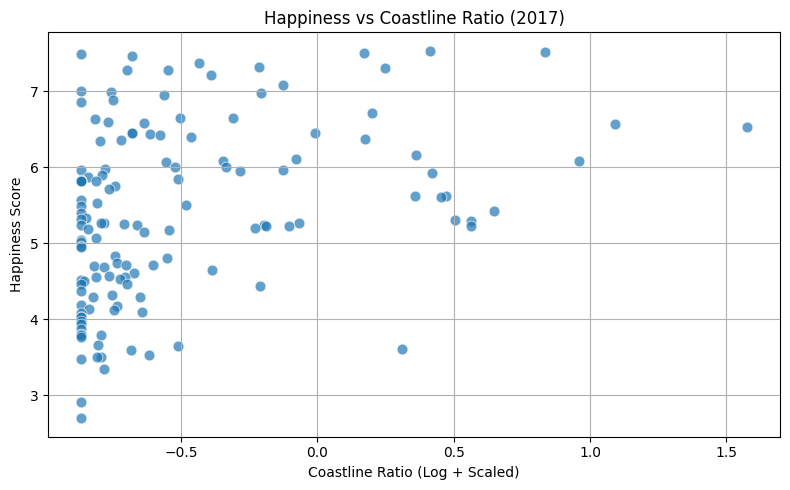

In [ ]:


coast_df = pd.read_csv("coastlines.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

coast_df = coast_df[["country", "coast_to_area_wf"]].dropna()
coast_df.columns = ["Country", "coast_ratio"]
coast_df["coast_log"] = np.log1p(coast_df["coast_ratio"])
scaler = StandardScaler()
coast_df["coast_log_scaled"] = scaler.fit_transform(coast_df[["coast_log"]])

merged = happiness_df.merge(coast_df, on="Country", how="inner")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged["coast_log_scaled"], y=merged["Happiness.Score"], s=60, alpha=0.7)
plt.xlabel("Coastline Ratio (Log + Scaled)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs Coastline Ratio (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-59-553eeb5cfc17>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged.groupby("coast_group")["Happiness.Score"].mean().reset_index()
<ipython-input-59-553eeb5cfc17>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="coast_group", y="Happiness.Score", palette="Blues")


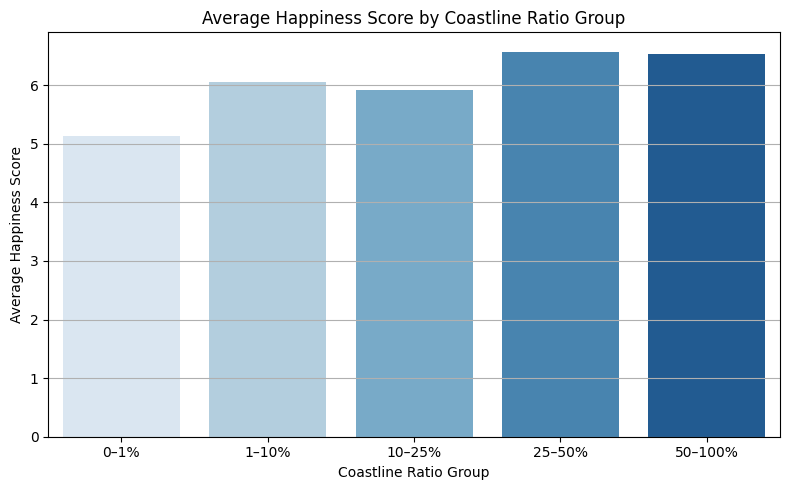

In [ ]:


coast_df = pd.read_csv("coastlines.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

coast_df = coast_df[["country", "coast_to_area_wf"]].dropna()
coast_df.columns = ["Country", "coast_ratio"]

bins = [0, 1, 10, 25, 50, 100]
labels = ["0–1%", "1–10%", "10–25%", "25–50%", "50–100%"]
coast_df["coast_group"] = pd.cut(coast_df["coast_ratio"], bins=bins, labels=labels, include_lowest=True)

merged = happiness_df.merge(coast_df, on="Country", how="inner")
grouped = merged.groupby("coast_group")["Happiness.Score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="coast_group", y="Happiness.Score", palette="Blues")
plt.xlabel("Coastline Ratio Group")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Coastline Ratio Group")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [6]:

df = pd.read_csv("coastlines.csv")
df = df.dropna(subset=["coast_to_area_wf"])
df["coast_ratio"] = df["coast_to_area_wf"]

data = df["coast_ratio"]

print("Coastline-to-Area Ratio (2017) % 0–100")
print(f"\nCount : {data.count()}")
print(f"Mean : {data.mean():.2f}")
print(f"Median : {data.median():.2f}")
print(f"Mode : {data.mode().iloc[0]:.2f}")
print(f"Variance : {data.var():.2f}")
print(f"\nStandard Deviation : {data.std():.2f}")


Coastline-to-Area Ratio (2017) % 0–100

Count : 235
Mean : 26.74
Median : 0.82
Mode : 0.00
Variance : 8235.38

Standard Deviation : 90.75


In [ ]:


coast_df = pd.read_csv("coastlines.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

coast_df = coast_df[["country", "coast_to_area_wf"]].dropna()
coast_df.columns = ["Country", "coast_ratio"]

coast_df["coast_log"] = np.log1p(coast_df["coast_ratio"])
scaler = StandardScaler()
coast_df["coast_log_scaled"] = scaler.fit_transform(coast_df[["coast_log"]])

merged = happiness_df.merge(coast_df, on="Country", how="inner")

pearson_r, pearson_p = pearsonr(merged["coast_log_scaled"], merged["Happiness.Score"])
spearman_r, spearman_p = spearmanr(merged["coast_log_scaled"], merged["Happiness.Score"])

print("Coastline Ratio vs Happiness Score (Log + Scaled)\n")

print("   Pearson Correlation")
print(f"   Correlation Coefficient (r): {pearson_r:.4f}")
print(f"   P-value                    : {pearson_p:.5f}\n")

print("   Spearman Correlation")
print(f"   Correlation Coefficient (ρ): {spearman_r:.4f}")
print(f"   P-value                    : {spearman_p:.5f}")


* Coastline Ratio vs Happiness Score (Log + Scaled)

   Pearson Correlation
   Correlation Coefficient (r): 0.3608
   P-value                    : 0.00001

   Spearman Correlation
   Correlation Coefficient (ρ): 0.4206
   P-value                    : 0.00000


## ARABLE LAND DATA

In [7]:

arable_countries = []
arable_values = []

with open("API_AG.LND.ARBL.ZS_DS2_en_csv_v2_87396.csv", encoding="utf-8") as f:
    lines = f.readlines()[5:]

    for line in lines:
        parts = line.strip().split(",")

        if len(parts) > 61:
            country = parts[0].replace('""', '').replace('"', '').strip()
            value = parts[61].replace('""', '').replace('"', '').strip()

            if value:
                try:
                    arable_values.append(float(value))
                    arable_countries.append(country)
                except ValueError:
                    continue

df_arable = pd.DataFrame({
    "Country": arable_countries,
    "ArableLand_2017": arable_values
})

print(df_arable.to_string(index=False))


                                             Country  ArableLand_2017
                                               Aruba        11.111111
                         Africa Eastern and Southern         8.164971
                                         Afghanistan        11.804118
                          Africa Western and Central        12.068163
                                              Angola         4.292933
                                             Albania        22.335766
                                             Andorra         1.744681
                                          Arab World         4.596060
                                United Arab Emirates         0.626584
                                           Argentina        14.753401
                                             Armenia        15.665613
                                      American Samoa         4.650000
                                 Antigua and Barbuda         9.090909
                    

In [ ]:


df = pd.read_csv("API_AG.LND.ARBL.ZS_DS2_en_csv_v2_87396.csv", skiprows=4)
df = df[["Country Name", "2017"]].dropna()
df.columns = ["country", "arable_land_percent"]
df.to_csv("arable_land_2017.csv", index=False)


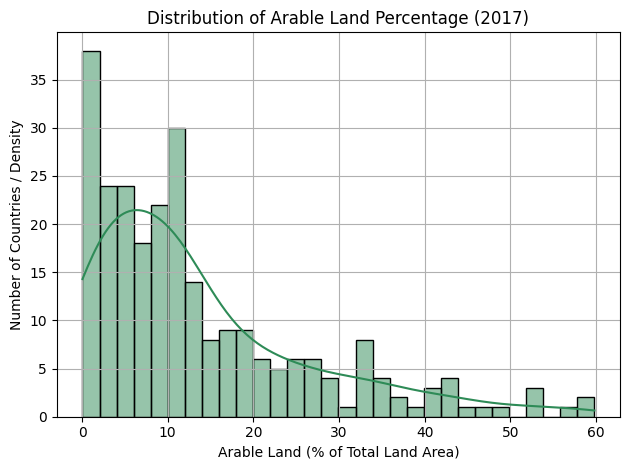

In [ ]:


df = pd.read_csv("arable_land_2017.csv")

sns.histplot(df["arable_land_percent"], bins=30, kde=True, color="seagreen", edgecolor="black")
plt.xlabel("Arable Land (% of Total Land Area)")
plt.ylabel("Number of Countries / Density")
plt.title("Distribution of Arable Land Percentage (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


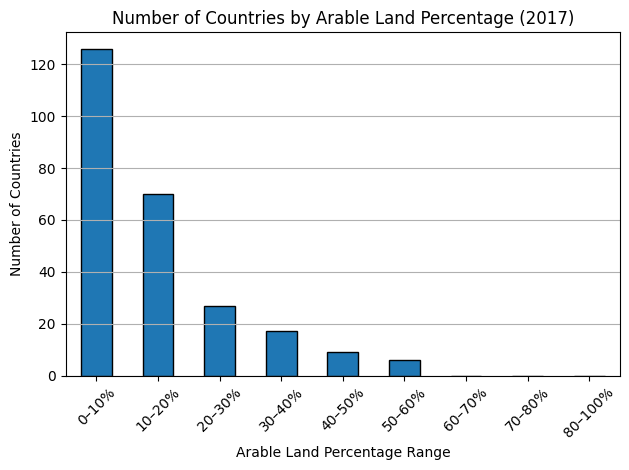

In [ ]:

df = pd.read_csv("arable_land_2017.csv")

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–40%", "40–50%", "50–60%", "60–70%", "70–80%", "80–100%"]
df["arable_bin"] = pd.cut(df["arable_land_percent"], bins=bins, labels=labels, include_lowest=True)

counts = df["arable_bin"].value_counts().sort_index()

counts.plot(kind="bar", edgecolor="black")
plt.xlabel("Arable Land Percentage Range")
plt.ylabel("Number of Countries")
plt.title("Number of Countries by Arable Land Percentage (2017)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


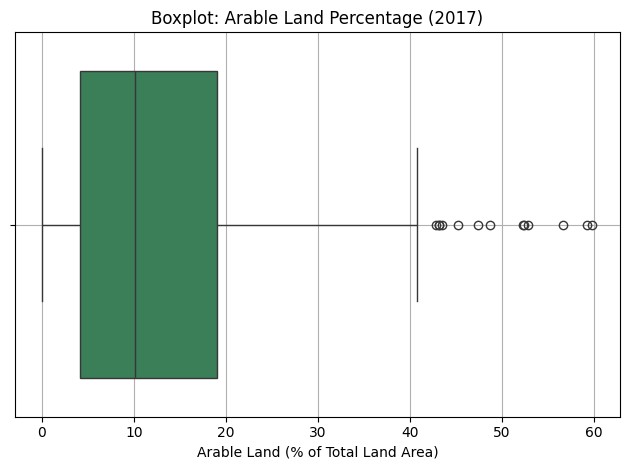

In [ ]:

sns.boxplot(x=df["arable_land_percent"], color="seagreen")
plt.xlabel("Arable Land (% of Total Land Area)")
plt.title("Boxplot: Arable Land Percentage (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:


df = pd.read_csv("arable_land_2017.csv")
data = df["arable_land_percent"].dropna()

print("Arable Land Ratio % 0–100")
print(f"\nCount : {data.count()}")
print(f"Mean : {data.mean():.2f}")
print(f"Median : {data.median():.2f}")
print(f"Mode : {data.mode().iloc[0]:.2f}")
print(f"Variance : {data.var():.2f}")
print(f"\nStandard Deviation : {data.std():.2f}")


Arable Land Ratio % 0–100

Count : 255
Mean : 13.68
Median : 10.08
Mode : 2.86
Variance : 167.22

Standard Deviation : 12.93


In [ ]:

arable_df = pd.read_csv("arable_land_2017.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

arable_df["arable_log"] = np.log1p(arable_df["arable_land_percent"])
scaler = StandardScaler()
arable_df["arable_log_scaled"] = scaler.fit_transform(arable_df[["arable_log"]])

merged = happiness_df.merge(arable_df, left_on="Country", right_on="country", how="inner")

pearson_r, pearson_p = pearsonr(merged["arable_log_scaled"], merged["Happiness.Score"])
spearman_r, spearman_p = spearmanr(merged["arable_log_scaled"], merged["Happiness.Score"])

print("* Arable Land vs Happiness Score (Log + Scaled)\n")

print("   Pearson Correlation")
print(f"   Correlation Coefficient (r): {pearson_r:.4f}")
print(f"   P-value                    : {pearson_p:.4f}\n")

print("   Spearman Correlation")
print(f"   Correlation Coefficient (ρ): {spearman_r:.4f}")
print(f"   P-value                    : {spearman_p:.4f}")


* Arable Land vs Happiness Score (Log + Scaled)

   Pearson Correlation
   Correlation Coefficient (r): -0.1380
   P-value                    : 0.1117

   Spearman Correlation
   Correlation Coefficient (ρ): -0.1371
   P-value                    : 0.1141


ARABLE LAND RATIO  X HAPPINESS SCORE

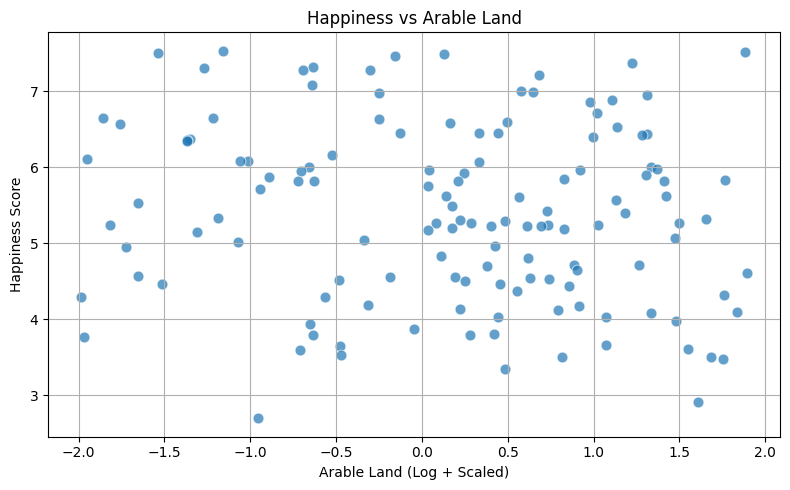

In [ ]:

arable_df = pd.read_csv("arable_land_2017.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

arable_df["arable_log"] = np.log1p(arable_df["arable_land_percent"])
scaler = StandardScaler()
arable_df["arable_log_scaled"] = scaler.fit_transform(arable_df[["arable_log"]])

merged = happiness_df.merge(arable_df, left_on="Country", right_on="country", how="inner")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged["arable_log_scaled"], y=merged["Happiness.Score"], s=60, alpha=0.7)
plt.xlabel("Arable Land (Log + Scaled)")
plt.ylabel("Happiness Score")
plt.title("Happiness vs Arable Land")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-61-38a16f382eaa>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged.groupby("arable_group")["Happiness.Score"].mean().reset_index()
<ipython-input-61-38a16f382eaa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="arable_group", y="Happiness.Score", palette="YlGn")


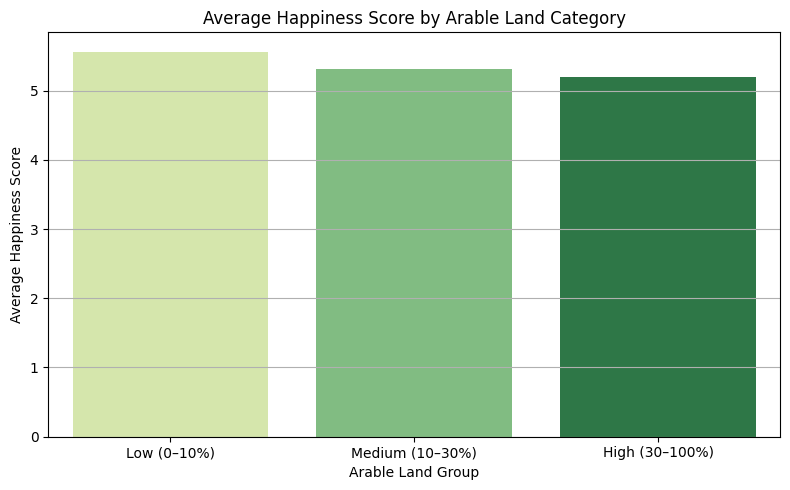

In [ ]:


arable_df = pd.read_csv("arable_land_2017.csv")
happiness_df = pd.read_excel("Filtered_Happiness_Data_2017 (1).xlsx")

bins = [0, 10, 30, 100]
labels = ["Low (0–10%)", "Medium (10–30%)", "High (30–100%)"]
arable_df["arable_group"] = pd.cut(arable_df["arable_land_percent"], bins=bins, labels=labels, include_lowest=True)

merged = happiness_df.merge(arable_df, left_on="Country", right_on="country", how="inner")
grouped = merged.groupby("arable_group")["Happiness.Score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x="arable_group", y="Happiness.Score", palette="YlGn")
plt.xlabel("Arable Land Group")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Arable Land Category")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# MACHINE LEARNING TECNIQUES

In [ ]:
def load_clean_wb(path, colname):
    with open(path, encoding="utf-8") as f:
        lines = f.readlines()[4:]
    rows = [r for r in csv.reader(lines, quotechar='"', delimiter=',') if len(r) > 63]
    countries = [r[0].replace('"', '') for r in rows]
    values = [r[59:64] for r in rows]
    df = pd.DataFrame(values, columns=["2015", "2016", "2017", "2018", "2019"])
    df.insert(0, "Country", countries)
    df = df.melt(id_vars="Country", var_name="Year", value_name=colname)
    df[colname] = pd.to_numeric(df[colname], errors="coerce")
    return df

def load_whi(path, year, country_col, score_col):
    df = pd.read_csv(path)
    df = df.rename(columns={country_col: "Country", score_col: "Happiness Score"})
    df = df[["Country", "Happiness Score"]]
    df["Year"] = year
    return df

whi_2015 = load_whi("2015.csv", "2015", "Country", "Happiness Score")
whi_2016 = load_whi("2016.csv", "2016", "Country", "Happiness Score")
whi_2017 = load_whi("2017.csv", "2017", "Country", "Happiness.Score")
whi_2018 = load_whi("2018.csv", "2018", "Country or region", "Score")
whi_2019 = load_whi("2019.csv", "2019", "Country or region", "Score")
whi_df = pd.concat([whi_2015, whi_2016, whi_2017, whi_2018, whi_2019])

edu = load_clean_wb("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "Tertiary Enrollment")
pollution = load_clean_wb("API_EN.ATM.PM25.MC.M3_DS2_en_csv_v2_87588.csv", "Air Pollution")
forest = load_clean_wb("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", "Forest Land")
arable = load_clean_wb("API_AG.LND.ARBL.ZS_DS2_en_csv_v2_87396.csv", "Arable Land")

coast = pd.read_csv("coastlines.csv")
coast = coast.rename(columns={"country": "Country", "coast_to_area_wf": "Coastline"})
coast = coast[["Country", "Coastline"]]

final_clean = whi_df.merge(edu, on=["Country", "Year"], how="left") \
    .merge(pollution, on=["Country", "Year"], how="left") \
    .merge(forest, on=["Country", "Year"], how="left") \
    .merge(coast, on="Country", how="left") \
    .merge(arable, on=["Country", "Year"], how="left")

final_clean.to_csv("final_merged_dataset_2015_2019.csv", index=False)


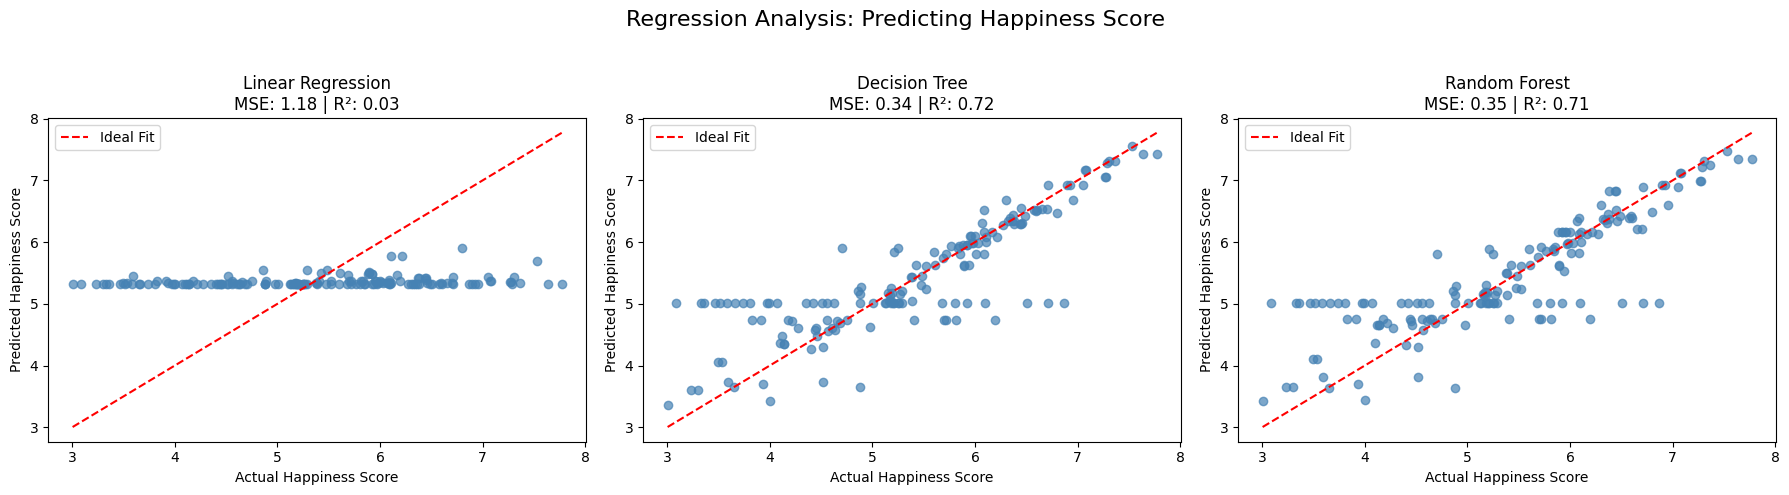

In [ ]:


def load_clean_wb(path, colname):
    with open(path, encoding="utf-8") as f:
        lines = f.readlines()[4:]
    rows = [r for r in csv.reader(lines, quotechar='"', delimiter=',') if len(r) > 63]
    countries = [r[0].replace('"', '') for r in rows]
    values = [r[59:64] for r in rows]
    df = pd.DataFrame(values, columns=["2015", "2016", "2017", "2018", "2019"])
    df.insert(0, "Country", countries)
    df = df.melt(id_vars="Country", var_name="Year", value_name=colname)
    df[colname] = pd.to_numeric(df[colname], errors="coerce")
    return df

def load_whi(path, year, country_col, score_col):
    df = pd.read_csv(path)
    df = df.rename(columns={country_col: "Country", score_col: "Happiness Score"})
    df = df[["Country", "Happiness Score"]]
    df["Year"] = year
    return df

whi_2015 = load_whi("2015.csv", "2015", "Country", "Happiness Score")
whi_2016 = load_whi("2016.csv", "2016", "Country", "Happiness Score")
whi_2017 = load_whi("2017.csv", "2017", "Country", "Happiness.Score")
whi_2018 = load_whi("2018.csv", "2018", "Country or region", "Score")
whi_2019 = load_whi("2019.csv", "2019", "Country or region", "Score")
whi_df = pd.concat([whi_2015, whi_2016, whi_2017, whi_2018, whi_2019])

edu = load_clean_wb("API_SE.TER.ENRR_DS2_en_csv_v2_23897.csv", "Tertiary Enrollment")
pollution = load_clean_wb("API_EN.ATM.PM25.MC.M3_DS2_en_csv_v2_87588.csv", "Air Pollution")
forest = load_clean_wb("API_AG.LND.FRST.ZS_DS2_en_csv_v2_85151.csv", "Forest Land")
arable = load_clean_wb("API_AG.LND.ARBL.ZS_DS2_en_csv_v2_87396.csv", "Arable Land")

coast = pd.read_csv("coastlines.csv")
coast = coast.rename(columns={"country": "Country", "coast_to_area_wf": "Coastline"})
coast = coast[["Country", "Coastline"]]

final_clean = whi_df.merge(edu, on=["Country", "Year"], how="left") \
    .merge(pollution, on=["Country", "Year"], how="left") \
    .merge(forest, on=["Country", "Year"], how="left") \
    .merge(coast, on="Country", how="left") \
    .merge(arable, on=["Country", "Year"], how="left")

cols_to_fill = ["Happiness Score", "Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land"]
final_clean[cols_to_fill] = final_clean[cols_to_fill].fillna(final_clean[cols_to_fill].mean())
final_clean[cols_to_fill] = final_clean[cols_to_fill].fillna(0)

X = final_clean[["Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land"]]
y = final_clean["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    predictions[name] = y_pred

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, y_pred) in enumerate(predictions.items()):
    axs[i].scatter(y_test, y_pred, alpha=0.7, color='steelblue')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    axs[i].set_title(f"{name}\nMSE: {results[name]['MSE']:.2f} | R²: {results[name]['R2']:.2f}")
    axs[i].set_xlabel("Actual Happiness Score")
    axs[i].set_ylabel("Predicted Happiness Score")
    axs[i].legend()

plt.suptitle("Regression Analysis: Predicting Happiness Score", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


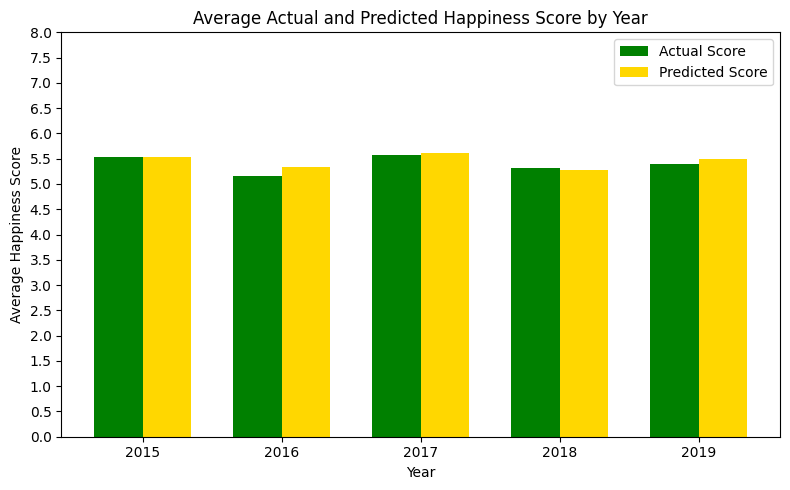

In [ ]:

df = pd.read_csv("final_merged_dataset_2015_2019.csv")

cols = ["Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land", "Happiness Score"]
df[cols] = df[cols].fillna(df[cols].mean())

X = df[["Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land"]]
y = df["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

df["Predicted Score"] = np.nan
df.loc[X_test.index, "Predicted Score"] = model.predict(X_test)

bar_data = df.dropna(subset=["Predicted Score"]).groupby("Year")[["Happiness Score", "Predicted Score"]].mean().reset_index()

x = np.arange(len(bar_data["Year"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, bar_data["Happiness Score"], width, label='Actual Score', color='green')
ax.bar(x + width/2, bar_data["Predicted Score"], width, label='Predicted Score', color='gold')

ax.set_ylabel("Average Happiness Score")
ax.set_xlabel("Year")
ax.set_title("Average Actual and Predicted Happiness Score by Year")
ax.set_xticks(x)
ax.set_xticklabels(bar_data["Year"])
ax.set_yticks(np.arange(0, 8.5, 0.5))
ax.legend()

plt.tight_layout()
plt.show()


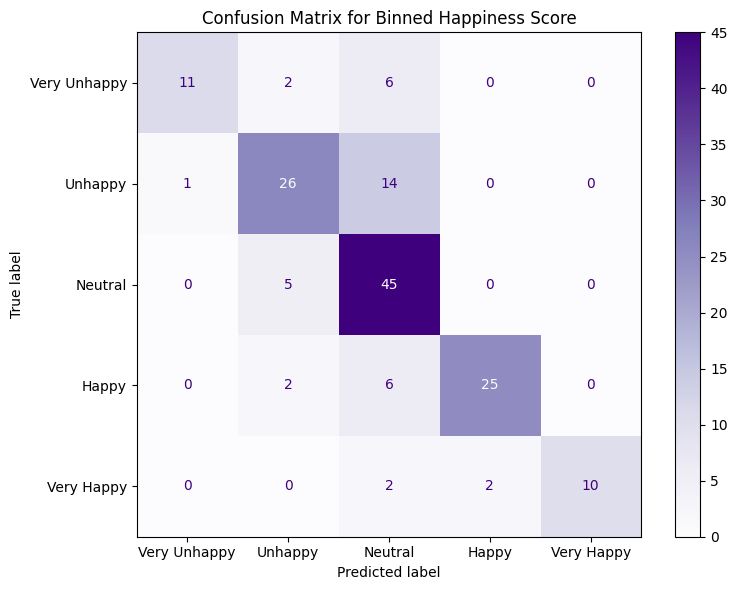

Very Unhappy: 0–4
 Unhappy: 4–5
 Neutral: 5–6
 Happy: 6–7
 Very Happy: 7–10


In [ ]:


df = pd.read_csv("final_merged_dataset_2015_2019.csv")

cols = ["Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land", "Happiness Score"]
df[cols] = df[cols].fillna(df[cols].mean())

bins = [0, 4, 5, 6, 7, 10]
labels = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df["Happiness Binned"] = pd.cut(df["Happiness Score"], bins=bins, labels=labels)

X = df[["Tertiary Enrollment", "Air Pollution", "Forest Land", "Coastline", "Arable Land"]]
y = df["Happiness Binned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap='Purples')
plt.title("Confusion Matrix for Binned Happiness Score")
plt.tight_layout()
plt.show()

print ("Very Unhappy: 0–4\n",
    "Unhappy: 4–5\n",
    "Neutral: 5–6\n",
    "Happy: 6–7\n",
    "Very Happy: 7–10")